## **1ère observation du fichier au format txt**

In [ ]:
# Open the file in read only mode.

text_file = open("/content/drive/MyDrive/datasets/DATASET NBA/NBAGAMES.txt", "r")

In [ ]:
# read the file and store the text in a variable
complete_text = text_file.read()


In [ ]:
complete_text[0:1000]

'GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,GAME_DATE,MATCHUP_HOME,WL_HOME,MIN_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,VIDEO_AVAILABLE_HOME,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,VIDEO_AVAILABLE_AWAY,GAME_DATE_EST,GAME_SEQUENCE,GAME_STATUS_ID,GAME_STATUS_TEXT,GAMECODE,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,LIVE_PERIOD,LIVE_PC_TIME,NATL_TV_BROADCASTER_ABBREVIATION,LIVE_PERIOD_TIME_BCAST,WH_STATUS,TEAM_CITY_HOME,PTS_PAINT_HOME,PTS_2ND_CHANCE_HOME,PTS_FB_HOME,LARGEST_LEAD_HOME,LEAD_CHANGES_HOME,TIMES_TIED_HOME,TEAM_TURNOVERS_HOME,TOTAL_TURNOVERS_HOME,TEAM_REBOUNDS_HOME,PTS_OFF_TO_HOME

In [ ]:
line = text_file.readlines()

In [ ]:
# no of lines
print('No of lines in file is ',format(len(line)))

No of lines in file is  0


In [ ]:
# print each line text
for line in line :
    print(line)

In [ ]:
filename="/content/drive/MyDrive/L'algo de Paulo - mission 1 - datasets/DATASET NBA/NBAGAMES.txt"

In [ ]:
#data = np.loadtxt(filename,
#delimiter=';' )#skiprows=none, usecols=[0,2],dtype=str)


# Transformation en csv sur excel puis début analyse

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
pd.set_option('display.max_columns', None)

In [ ]:
from IPython.display import display

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/datasets/DATASET NBA/NBAGAMES.csv", sep='\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (58,64,65,68,79,93,96,114) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62448 entries, 0 to 62447
Columns: 149 entries, GAME_ID to HISTORICAL_STATUS
dtypes: float64(100), int64(16), object(33)
memory usage: 71.0+ MB


In [ ]:
df.head()

GAME_ID  SEASON_ID  TEAM_ID_HOME TEAM_ABBREVIATION_HOME  \
0  24600001      21946    1610610035                    HUS   
1  24600003      21946    1610610034                    BOM   
2  24600004      21946    1610610025                    CHS   
3  24600002      21946    1610610032                    PRO   
4  24600005      21946    1610610028                    DEF   

            TEAM_NAME_HOME   GAME_DATE MATCHUP_HOME WL_HOME  MIN_HOME  \
0          Toronto Huskies  1946-11-01  HUS vs. NYK       L         0   
1        St. Louis Bombers  1946-11-02  BOM vs. PIT       W         0   
2            Chicago Stags  1946-11-02  CHS vs. NYK       W         0   
3  Providence Steamrollers  1946-11-02  PRO vs. BOS       W         0   
4          Detroit Falcons  1946-11-02  DEF vs. WAS       L         0   

   FGM_HOME  FGA_HOME  FG_PCT_HOME  FG3M_HOME  FG3A_HOME  FG3_PCT_HOME  \
0      25.0       NaN          NaN        NaN        NaN           NaN   
1      20.0      59.0        0.339        NaN        NaN           NaN   
2      21.0       NaN          NaN        NaN        NaN           NaN   
3      21.0       NaN          NaN        NaN        NaN           NaN   
4      10.0       NaN          NaN        NaN        NaN           NaN   

   FTM_HOME  FTA_HOME  FT_PCT_HOME  OREB_HOME  DREB_HOME  REB_HOME  AST_HOME  \
0      16.0      29.0        0.552        NaN        NaN       NaN       NaN   
1      16.0       NaN          NaN        NaN        NaN       NaN       NaN   
2      21.0       NaN          NaN        NaN        NaN       NaN       NaN   
3      17.0       NaN          NaN        NaN        NaN       NaN       NaN   
4      13.0       NaN          NaN        NaN        NaN       NaN       NaN   

   STL_HOME  BLK_HOME  TOV_HOME  PF_HOME  PTS_HOME  PLUS_MINUS_HOME  \
0       NaN       NaN       NaN      NaN        66               -2   
1       NaN       NaN       NaN     21.0        56                5   
2       NaN       NaN       NaN     20.0        63               16   
3       NaN       NaN       NaN      NaN        59                6   
4       NaN       NaN       NaN      NaN        33              -17   

   VIDEO_AVAILABLE_HOME  TEAM_ID_AWAY TEAM_ABBREVIATION_AWAY  \
0                     0    1610612752                    NYK   
1                     0    1610610031                    PIT   
2                     0    1610612752                    NYK   
3                     0    1610612738                    BOS   
4                     0    1610610036                    WAS   

        TEAM_NAME_AWAY MATCHUP_AWAY WL_AWAY  MIN_AWAY  FGM_AWAY  FGA_AWAY  \
0      New York Knicks    NYK @ HUS       W         0      24.0       NaN   
1   Pittsburgh Ironmen    PIT @ BOM       L         0      16.0      72.0   
2      New York Knicks    NYK @ CHS       L         0      16.0       NaN   
3       Boston Celtics    BOS @ PRO       L         0      21.0       NaN   
4  Washington Capitols    WAS @ DEF       W         0      18.0       NaN   

   FG_PCT_AWAY  FG3M_AWAY  FG3A_AWAY  FG3_PCT_AWAY  FTM_AWAY  FTA_AWAY  \
0          NaN        NaN        NaN           NaN      20.0      26.0   
1        0.222        NaN        NaN           NaN      19.0       NaN   
2          NaN        NaN        NaN           NaN      15.0       NaN   
3          NaN        NaN        NaN           NaN      11.0       NaN   
4          NaN        NaN        NaN           NaN      14.0       NaN   

   FT_PCT_AWAY  OREB_AWAY  DREB_AWAY  REB_AWAY  AST_AWAY  STL_AWAY  BLK_AWAY  \
0        0.769        NaN        NaN       NaN       NaN       NaN       NaN   
1          NaN        NaN        NaN       NaN       NaN       NaN       NaN   
2          NaN        NaN        NaN       NaN       NaN       NaN       NaN   
3          NaN        NaN        NaN       NaN       NaN       NaN       NaN   
4          NaN        NaN        NaN       NaN       NaN       NaN       NaN   

   TOV_AWAY  PF_AWAY  PTS_AWAY  PLUS_MINUS_AWAY  VIDEO_AVAI

In [ ]:
df.sample(10)

GAME_ID  SEASON_ID  TEAM_ID_HOME TEAM_ABBREVIATION_HOME  \
42747  20400711      22004    1610612749                    MIL   
27913  29100546      21991    1610612753                    ORL   
2453   25200325      21952    1610612758                    ROC   
40674  20201017      22002    1610612737                    ATL   
52387  21200758      22012    1610612751                    BKN   
48658  20900474      22009    1610612737                    ATL   
20478  28400126      21984    1610612746                    LAC   
2046   25100247      21951    1610610030                    INO   
2146   25200018      21952    1610612758                    ROC   
40310  20200659      22002    1610612751                    NJN   

               TEAM_NAME_HOME   GAME_DATE MATCHUP_HOME WL_HOME  MIN_HOME  \
42747         Milwaukee Bucks  2005-02-08  MIL vs. BOS       W       240   
27913           Orlando Magic  1992-01-24  ORL vs. DAL       W       240   
2453         Rochester Royals  1953-03-07  ROC vs. MNL       W         0   
40674           Atlanta Hawks  2003-03-25  ATL vs. LAL       L       240   
52387           Brooklyn Nets  2013-02-10  BKN vs. SAS       L       240   
48658           Atlanta Hawks  2010-01-01  ATL vs. NYK       L       265   
20478    Los Angeles Clippers  1984-11-17  LAC vs. KCK       W       240   
2046   Indianapolis Olympians  1952-02-12  INO vs. FTW       W         0   
2146         Rochester Royals  1952-11-08  ROC vs. INO       W         0   
40310         New Jersey Nets  2003-01-31  NJN vs. NOH       W       240   

       FGM_HOME  FGA_HOME  FG_PCT_HOME  FG3M_HOME  FG3A_HOME  FG3_PCT_HOME  \
42747      41.0      76.0        0.539       10.0       19.0         0.526   
27913      44.0      90.0        0.489        3.0        9.0         0.333   
2453       31.0       NaN          NaN        NaN        NaN           NaN   
40674      34.0      74.0        0.459        5.0       14.0         0.357   
52387      34.0      72.0        0.472        6.0       19.0         0.316   
48658      46.0     100.0        0.460        7.0       27.0         0.259   
20478      53.0      96.0        0.552        0.0        NaN           NaN   
2046       24.0       NaN          NaN        NaN        NaN           NaN   
2146       31.0       NaN          NaN        NaN        NaN           NaN   
40310      33.0      73.0        0.452        2.0        8.0         0.250   

       FTM_HOME  FTA_HOME  FT_PCT_HOME  OREB_HOME  DREB_HOME  REB_HOME  \
42747      29.0      36.0        0.806       12.0       28.0      40.0   
27913      30.0      36.0        0.833       13.0       38.0      51.0   
2453       22.0       NaN          NaN        NaN        NaN       NaN   
40674      18.0      21.0        0.857        9.0       31.0      40.0   
52387      12.0      17.0        0.706       12.0       27.0      39.0   
48658       9.0      14.0        0.643       17.0       31.0      48.0   
20478      15.0      19.0        0.789        NaN        NaN      45.0   
2046       32.0       NaN          NaN        NaN        NaN       NaN   
2146       37.0       NaN          NaN        NaN        NaN       NaN   
40310      21.0      23.0        0.913       11.0       34.0      45.0   

       AST_HOME  STL_HOME  BLK_HOME  TOV_HOME  PF_HOME  PTS_HOME  \
42747      25.0      10.0       3.0      17.0     22.0       121   
27913      26.0       6.0       8.0       9.0     27.0       121   
2453        NaN       NaN       NaN       NaN     17.0        84   
40674      28.0       5.0       5.0      21.0     23.0        91   
52387      12.0       2.0       4.0      18.0     17.0        86   
48658      26.0       7.0       7.0      10.0     18.0       108   
20478      19.0       NaN       NaN       NaN     23.0       121   
2046        NaN       NaN       NaN       NaN     18.0        80   
2146        NaN       NaN       NaN       NaN     40.0        99   
40310      22.0       6.0       5.0      12.0     17.0        89   

       PLU

In [ ]:
print(df.TEAM_NAME_HOME.unique)

<bound method Series.unique of 0                Toronto Huskies
1              St. Louis Bombers
2                  Chicago Stags
3        Providence Steamrollers
4                Detroit Falcons
                  ...           
62443     Portland Trail Blazers
62444     Minnesota Timberwolves
62445              Chicago Bulls
62446       New Orleans Pelicans
62447           Sacramento Kings
Name: TEAM_NAME_HOME, Length: 62448, dtype: object>


In [ ]:
# Separation des colonnes object et numeric
object_column=[col for col in df.columns if df[col].dtype=='object']
len(object_column)

33

In [ ]:
object_nunique=list(map(lambda col : df[col].nunique(),object_column))
a = dict(zip(object_column,object_nunique))
sorted (a.items(), key=lambda x : x[1])

[('WL_HOME', 2),
 ('WL_AWAY', 2),
 ('GAME_STATUS_TEXT', 11),
 ('NATL_TV_BROADCASTER_ABBREVIATION', 15),
 ('LIVE_PC_TIME', 33),
 ('TEAM_CITY_HOME', 34),
 ('TEAM_CITY_AWAY', 34),
 ('TEAM_NICKNAME_HOME', 50),
 ('TEAM_NICKNAME_AWAY', 50),
 ('LAST_GAME_HOME_TEAM_NAME', 50),
 ('LAST_GAME_VISITOR_TEAM_NAME', 50),
 ('TEAM_CITY_NAME_HOME', 54),
 ('TEAM_CITY_NAME_AWAY', 54),
 ('LAST_GAME_HOME_TEAM_CITY', 54),
 ('LAST_GAME_VISITOR_TEAM_CITY', 54),
 ('SERIES_LEADER', 56),
 ('TEAM_NAME_HOME', 72),
 ('TEAM_NAME_AWAY', 72),
 ('TEAM_ABBREVIATION_HOME', 74),
 ('TEAM_ABBREVIATION_AWAY', 74),
 ('LAST_GAME_HOME_TEAM_ABBREVIATION', 74),
 ('LAST_GAME_VISITOR_TEAM_CITY1', 74),
 ('LIVE_PERIOD_TIME_BCAST', 80),
 ('GAME_TIME', 139),
 ('MATCHUP_HOME', 2269),
 ('MATCHUP_AWAY', 2269),
 ('TEAM_WINS_LOSSES_AWAY', 2502),
 ('TEAM_WINS_LOSSES_HOME', 2507),
 ('GAME_DATE', 11015),
 ('GAME_DATE_DAY', 11016),
 ('GAME_DATE_EST', 11034),
 ('LAST_GAME_DATE_EST', 11906),
 ('GAMECODE', 62379)]

In [ ]:
print(df.GAME_STATUS_TEXT.value_counts())

In [ ]:
print(df.TEAM_CITY_HOME.value_counts()) #54

In [ ]:
print(df.TEAM_NAME_HOME.value_counts())  #74


Boston Celtics        2935
New York Knicks       2922
Detroit Pistons       2553
Los Angeles Lakers    2475
Philadelphia 76ers    2340
                      ... 
Detroit Falcons         30
Toronto Huskies         30
Cleveland Rebels        30
Pittsburgh Ironmen      30
Indianapolis Jets       29
Name: TEAM_NAME_HOME, Length: 72, dtype: int64


In [ ]:
# numeric columns identification

In [ ]:
num_column=[col for col in df.columns if df[col].dtype in ['int64','float64']]
len(num_column)

116

In [ ]:
df.describe()

GAME_ID     SEASON_ID  TEAM_ID_HOME      MIN_HOME      FGM_HOME  \
count  6.244800e+04  62448.000000  6.244800e+04  62448.000000  62430.000000   
mean   2.513506e+07  21991.655874  1.610613e+09    218.888147     39.956816   
std    3.594942e+06     18.970710  3.553851e+02     70.834923      6.799560   
min    2.000000e+07  21946.000000  1.610610e+09      0.000000      4.000000   
25%    2.130002e+07  21978.000000  1.610613e+09    240.000000     35.000000   
50%    2.640011e+07  21994.000000  1.610613e+09    240.000000     40.000000   
75%    2.850037e+07  22007.000000  1.610613e+09    240.000000     44.000000   
max    2.990119e+07  22020.000000  1.610613e+09    365.000000     72.000000   

           FGA_HOME   FG_PCT_HOME     FG3M_HOME     FG3A_HOME  FG3_PCT_HOME  \
count  44586.000000  44548.000000  46791.000000  41527.000000  41142.000000   
mean      83.900305      0.467941      5.321152     16.547018      0.346580   
std        9.135863      0.063452      4.225780      9.617828      0.154537   
min        0.000000      0.140000      0.000000      0.000000      0.000000   
25%       78.000000      0.427000      2.000000      9.000000      0.258000   
50%       83.000000      0.467000      5.000000     15.000000      0.348000   
75%       89.000000      0.507000      8.000000     22.000000      0.438000   
max      240.000000      5.125000     28.000000     70.000000      1.000000   

           FTM_HOME      FTA_HOME   FT_PCT_HOME     OREB_HOME     DREB_HOME  \
count  62427.000000  59412.000000  59409.000000  41240.000000  41171.000000   
mean      20.841479     27.359153      0.754420     12.228952     31.214690   
std        7.182259      8.918174      0.098285      4.440478      5.564032   
min        0.000000      0.000000      0.000000      0.000000      6.000000   
25%       16.000000     21.000000      0.692000      9.000000     27.000000   
50%       20.000000     27.000000      0.760000     12.000000     31.000000   
75%       25.000000     33.000000      0.821000     15.000000     35.000000   
max       61.000000     86.000000      4.167000     37.000000     55.000000   

           REB_HOME      AST_HOME      STL_HOME      BLK_HOME      TOV_HOME  \
count  44340.000000  44204.000000  41323.000000  41532.000000  41503.000000   
mean      43.733897     23.946498      8.007720      5.351151     14.779606   
std        7.201578      5.692134      3.112862      2.794964      4.084156   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       39.000000     20.000000      6.000000      3.000000     12.000000   
50%       43.000000     24.000000      8.000000      5.000000     15.000000   
75%       48.000000     28.000000     10.000000      7.000000     17.000000   
max       95.000000     52.000000     27.000000     23.000000     39.000000   

            PF_HOME      PTS_HOME  PLUS_MINUS_HOME  VIDEO_AVAILABLE_HOME  \
count  59512.000000  62448.000000     62448.000000          62448.000000   
mean      22.464293    104.744011         3.704250              0.173632   
std        5.017276     14.747103        12.985782              0.384836   
min        0.000000     18.000000       -57.000000              0.000000   
25%       19.000000     95.000000        -5.000000              0.000000   
50%       22.000000    105.000000         4.000000              0.000000   
75%       26.000000    114.000000        12.000000              0.000000   
max      107.000000    184.000000        68.000000              2.000000   

       TEAM_ID_AWAY      MIN_AWAY      FGM_AWAY      FGA_AWAY   FG_PCT_AWAY  \
count  6.244800e+04  62448.000000  62433.000000  44587.000000  44550.000000   
mean   1.610613e+09    218.887715     38.591242     83.669545      0.455125   
std    3.586082e+02     70.835764      6.487174      9.070819      0.057930   
min    1.610610e+09      0.000000      4.000000      0.000000      0.164000   
25%    1.610613e+09    240.000000     34.000000     78.000000      0.417000   
50%  

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62448 entries, 0 to 62447
Columns: 149 entries, GAME_ID to HISTORICAL_STATUS
dtypes: float64(100), int64(16), object(33)
memory usage: 71.0+ MB


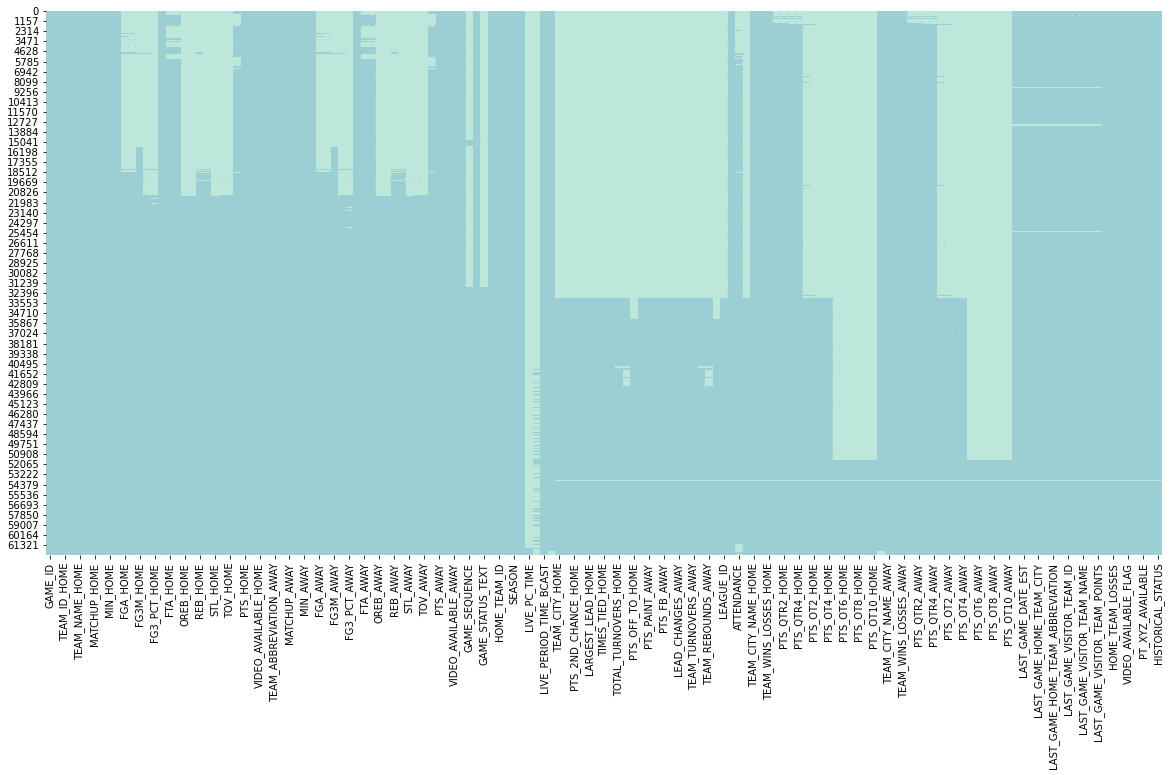

In [ ]:
# cartographies des données manquantes X_train heatmap
plt.figure(figsize=(20,10))

sns.color_palette("crest", as_cmap=True)
sns.heatmap(df.notna(), cmap="icefire", center = 10.0, cbar=False);

# 1eres observations
## -> Bcp de critères non renseignés au début du dataset 1946 & sont renseignés par la suite, cela doit correspondre à de nouveaux suivis statistiques qui apparaissent avec le temps

In [ ]:
# liste détaillée des NaN
df.isna().sum()

GAME_ID                                 0
SEASON_ID                               0
TEAM_ID_HOME                            0
TEAM_ABBREVIATION_HOME                  0
TEAM_NAME_HOME                          0
GAME_DATE                               0
MATCHUP_HOME                            0
WL_HOME                                40
MIN_HOME                                0
FGM_HOME                               18
FGA_HOME                            17862
FG_PCT_HOME                         17900
FG3M_HOME                           15657
FG3A_HOME                           20921
FG3_PCT_HOME                        21306
FTM_HOME                               21
FTA_HOME                             3036
FT_PCT_HOME                          3039
OREB_HOME                           21208
DREB_HOME                           21277
REB_HOME                            18108
AST_HOME                            18244
STL_HOME                            21125
BLK_HOME                          

In [ ]:
# CALCUL % VALEURS MANQUANTES
a = np.round((df.isna().sum()/len(df))*100,2)

In [ ]:
df2=pd.DataFrame(a, columns=['%NaN données brutes'])
df2

%NaN données brutes
GAME_ID                                          0.00
SEASON_ID                                        0.00
TEAM_ID_HOME                                     0.00
TEAM_ABBREVIATION_HOME                           0.00
TEAM_NAME_HOME                                   0.00
GAME_DATE                                        0.00
MATCHUP_HOME                                     0.00
WL_HOME                                          0.06
MIN_HOME                                         0.00
FGM_HOME                                         0.03
FGA_HOME                                        28.60
FG_PCT_HOME                                     28.66
FG3M_HOME                                       25.07
FG3A_HOME                                       33.50
FG3_PCT_HOME                                    34.12
FTM_HOME                                         0.03
FTA_HOME                                         4.86
FT_PCT_HOME                                      4.87
OREB_HOME                                       33.96
DREB_HOME                                       34.07
REB_HOME                                        29.00
AST_HOME                                        29.21
STL_HOME                                        33.83
BLK_HOME                                        33.49
TOV_HOME                                        33.54
PF_HOME                                          4.70
PTS_HOME                                         0.00
PLUS_MINUS_HOME                                  0.00
VIDEO_AVAILABLE_HOME                             0.00
TEAM_ID_AWAY                                     0.00
TEAM_ABBREVIATION_AWAY                           0.00
TEAM_NAME_AWAY                                   0.00
MATCHUP_AWAY                                     0.00
WL_AWAY                                          0.06
MIN_AWAY                                         0.00
FGM_AWAY                                         0.02
FGA_AWAY                                        28.60
FG_PCT_AWAY                                     28.66
FG3M_AWAY                                       25.07
FG3A_AWAY                                       33.50
FG3_PCT_AWAY                                    33.96
FTM_AWAY                                         0.02
FTA_AWAY                                         4.86
FT_PCT_AWAY                                      4.86
OREB_AWAY                                       33.96
DREB_AWAY                                       34.07
REB_AWAY                                        28.99
AST_AWAY                                        29.21
STL_AWAY                                        33.83
BLK_AWAY                                        33.49
TOV_AWAY                                        33.54
PF_AWAY                                          4.69
PTS_AWAY                                         0.00
PLUS_MINUS_AWAY                                  0.00
VIDEO_AVAILABLE_AWAY                             0.00
GAME_DATE_EST                                    0.00
GAME_SEQUENCE                                   49.85
GAME_STATUS_ID                                   0.00
GAME_STATUS_TEXT                                50.73
GAMECODE                                         0.00
HOME_TEAM_ID                                     0.00
VISITOR_TEAM_ID                                  0.00
SEASON                                           0.00
LIVE_PERIOD                                      0.00
LIVE_PC_TIME                                    99.03
NATL_TV_BROADCASTER_ABBREVIATION                92.72
LIVE_PERIOD_TIME_BCAST                           0.00
WH_STATUS                                        0.69
TEAM_CITY_HOME                                  52.93
PTS_PAINT_HOME                                  52.93
PTS_2ND_CHANCE_HOME                             52.93
PTS_FB_HOME                                     52.93
LARGEST_LEAD_HOME                               52.93
LEAD_CHANGES_HOME                     

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


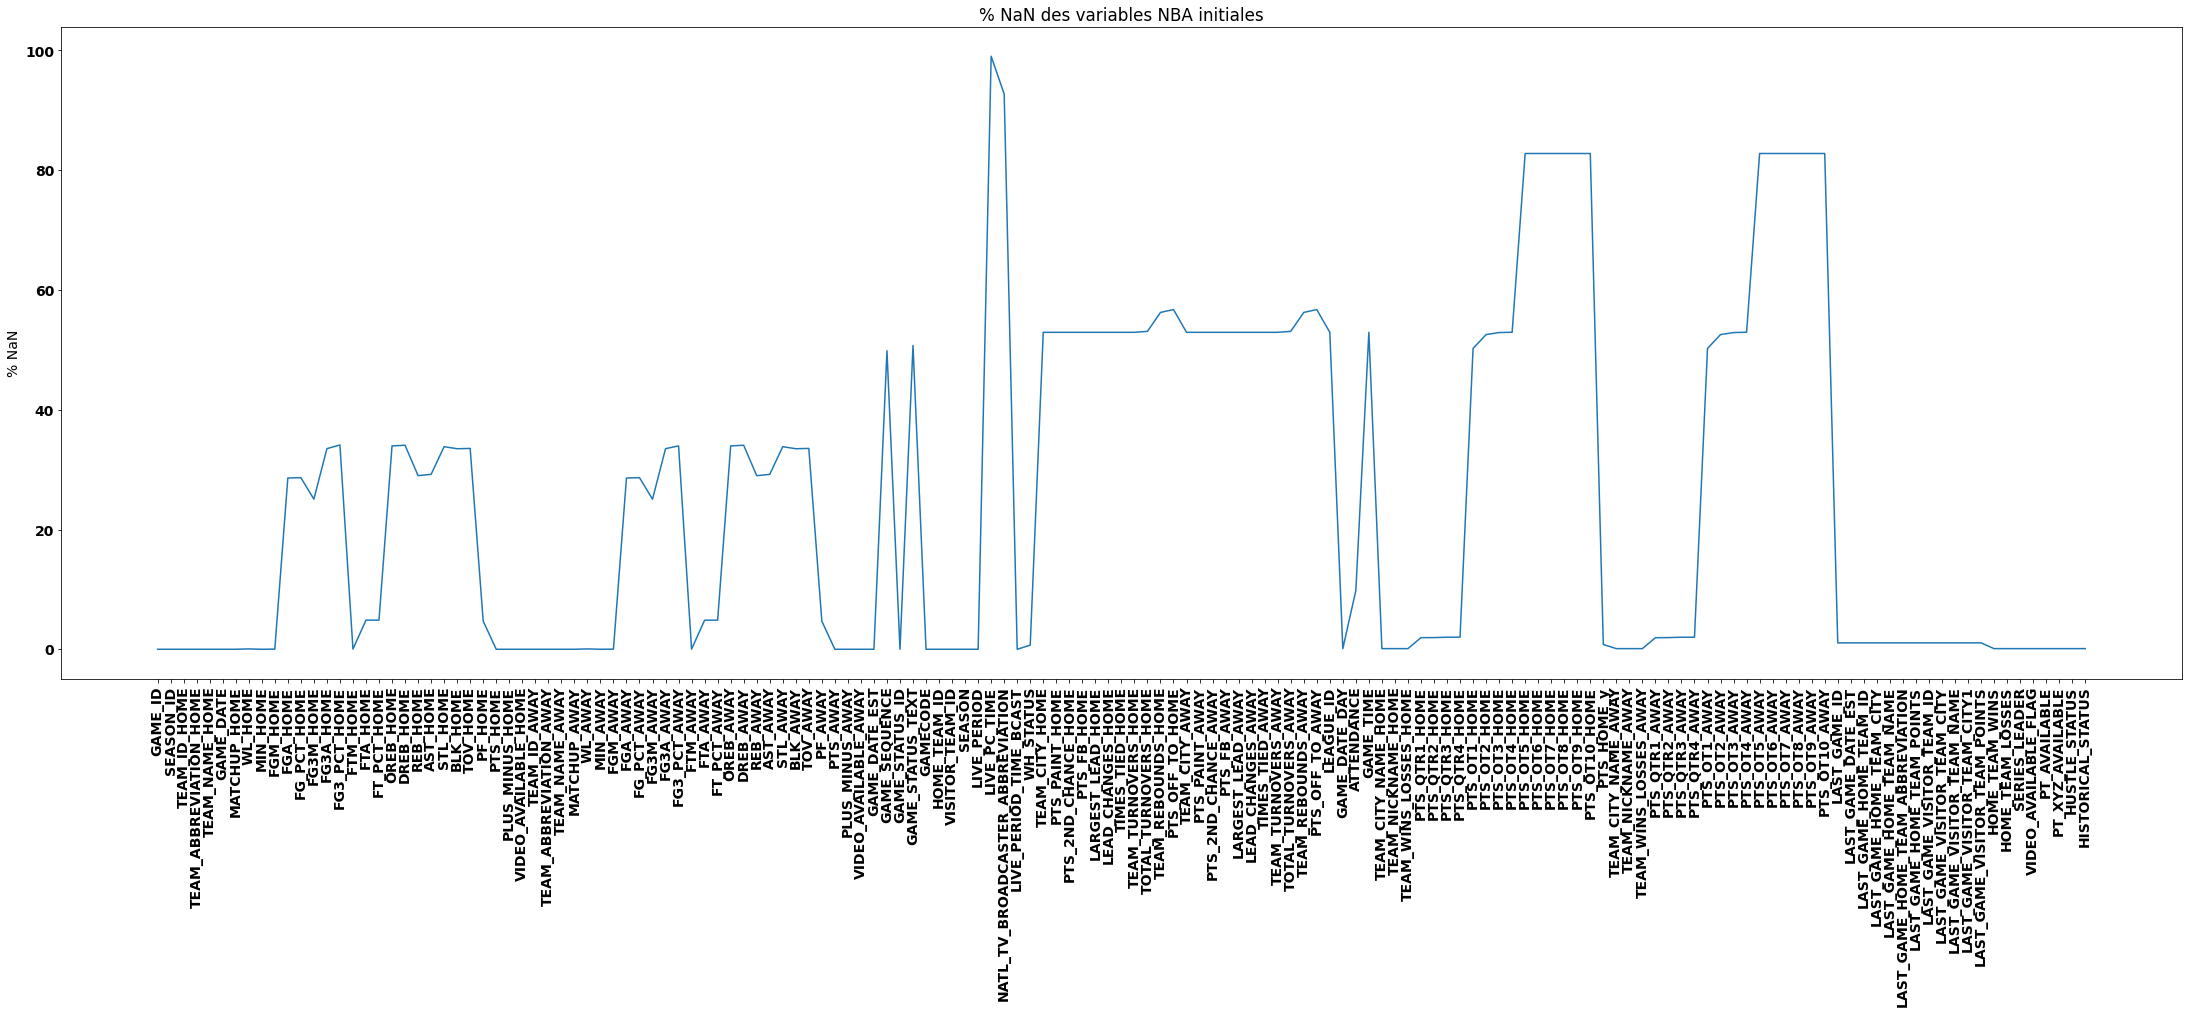

In [ ]:
plt.figure(figsize=(38,12))

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)
plt.title ('% NaN des variables NBA initiales')
plt.ylabel('% NaN')
plt.xticks(rotation=90)
plt.plot(df2);

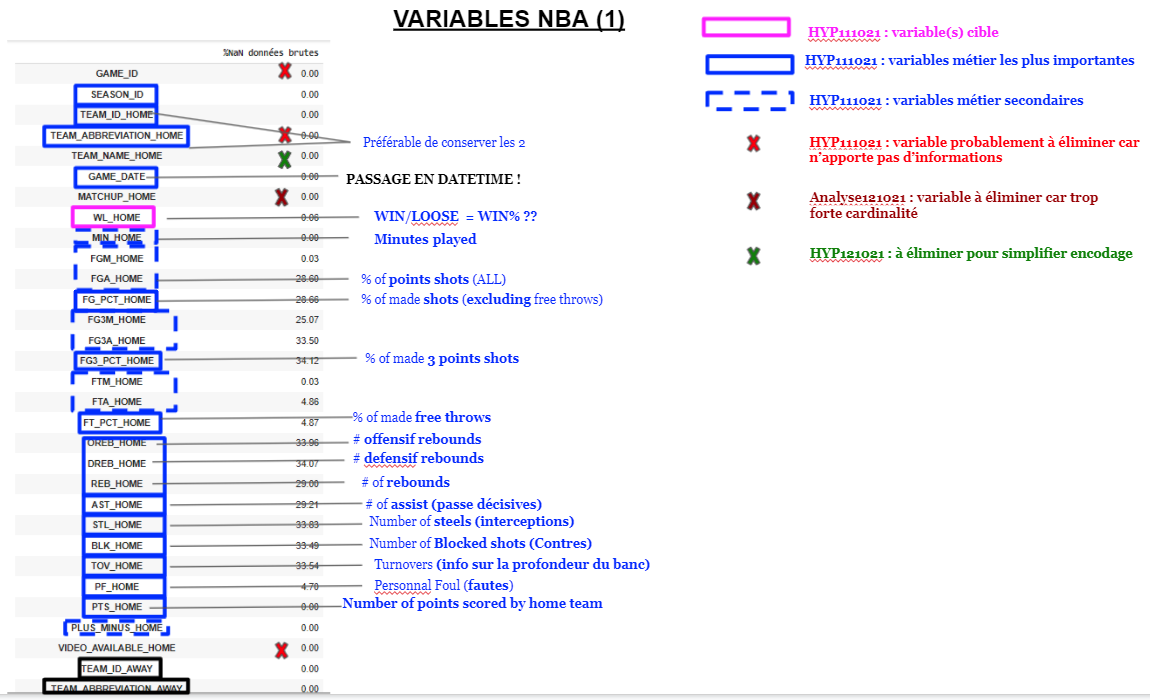

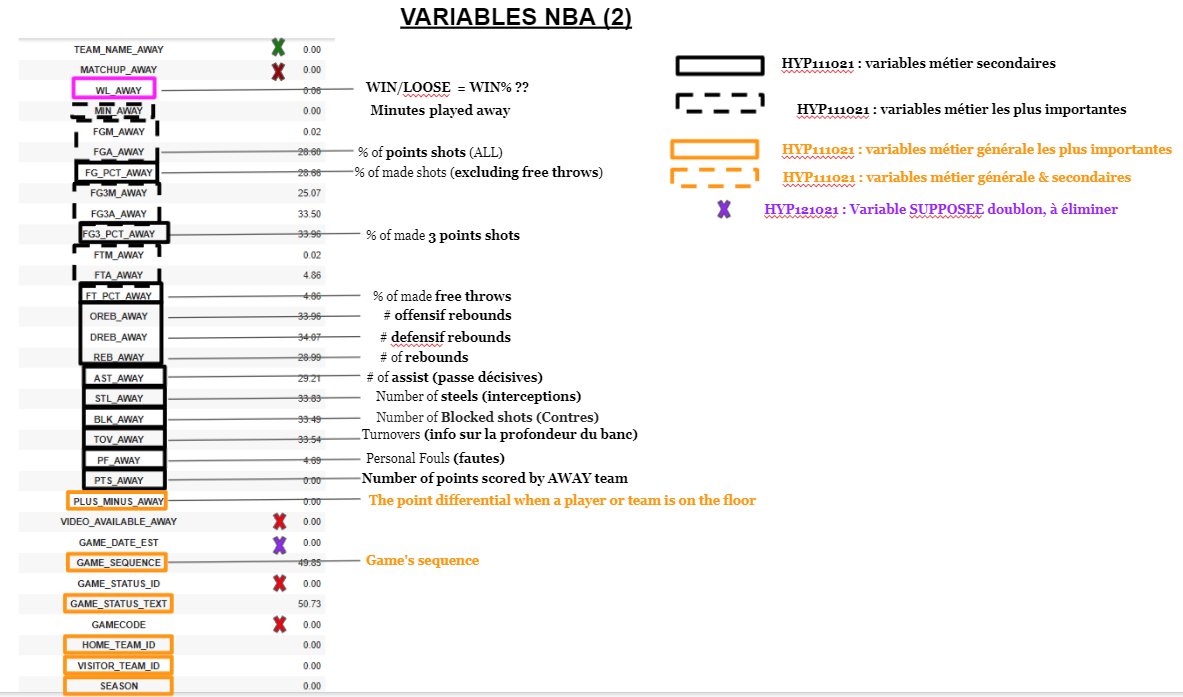

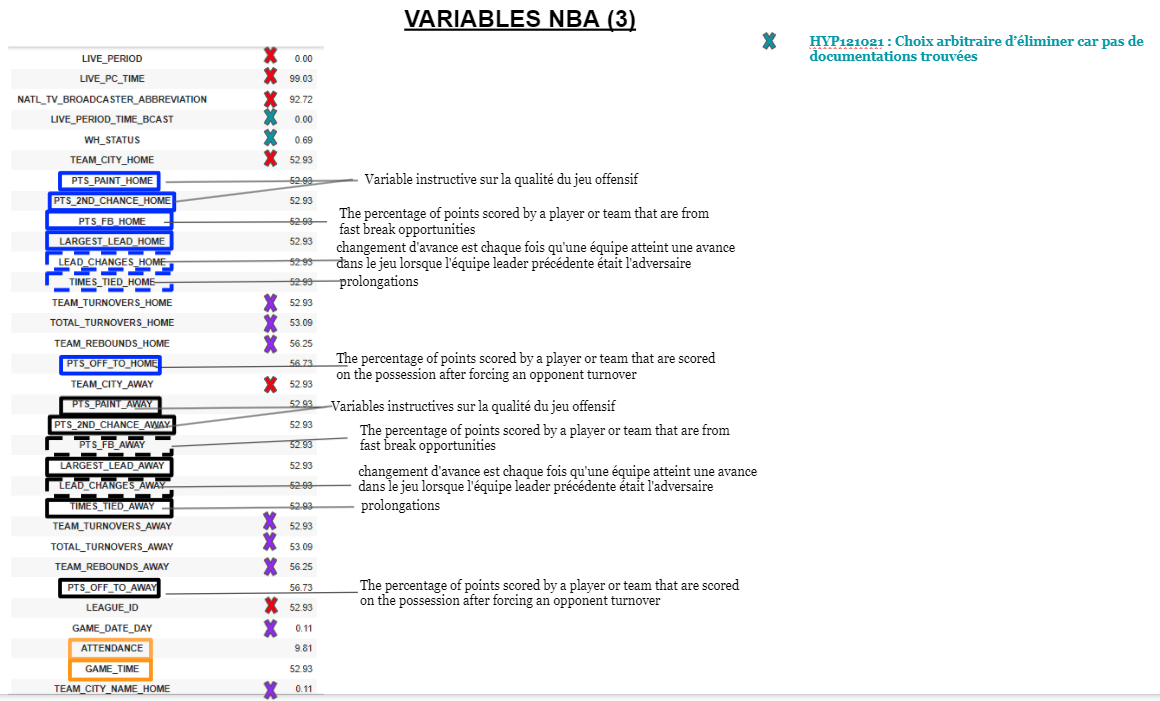

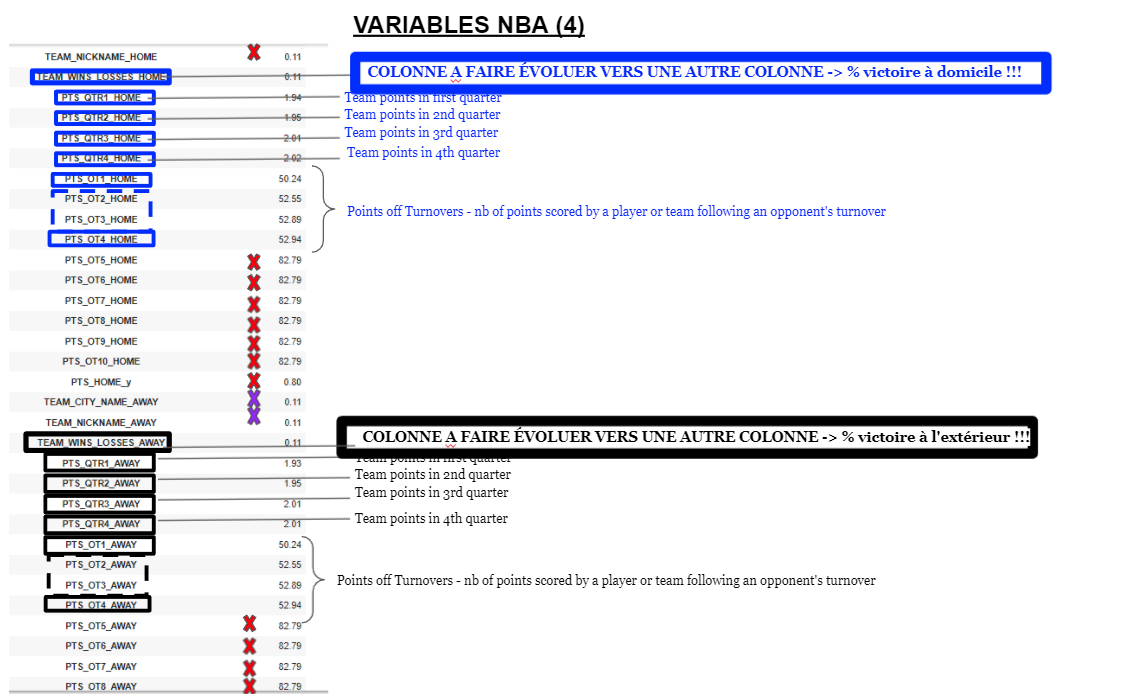

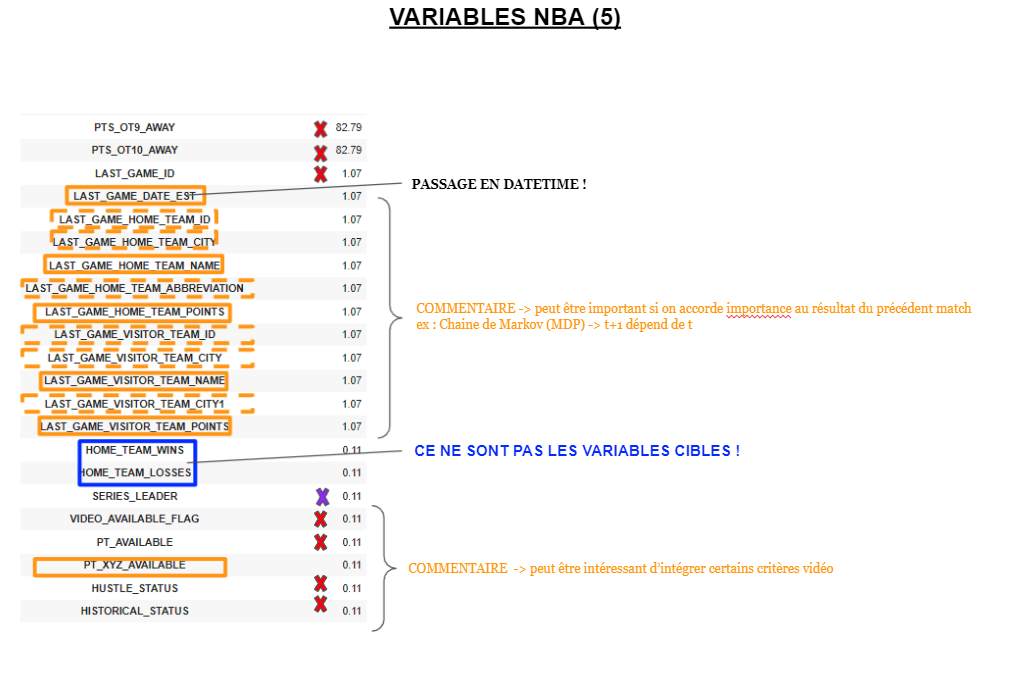

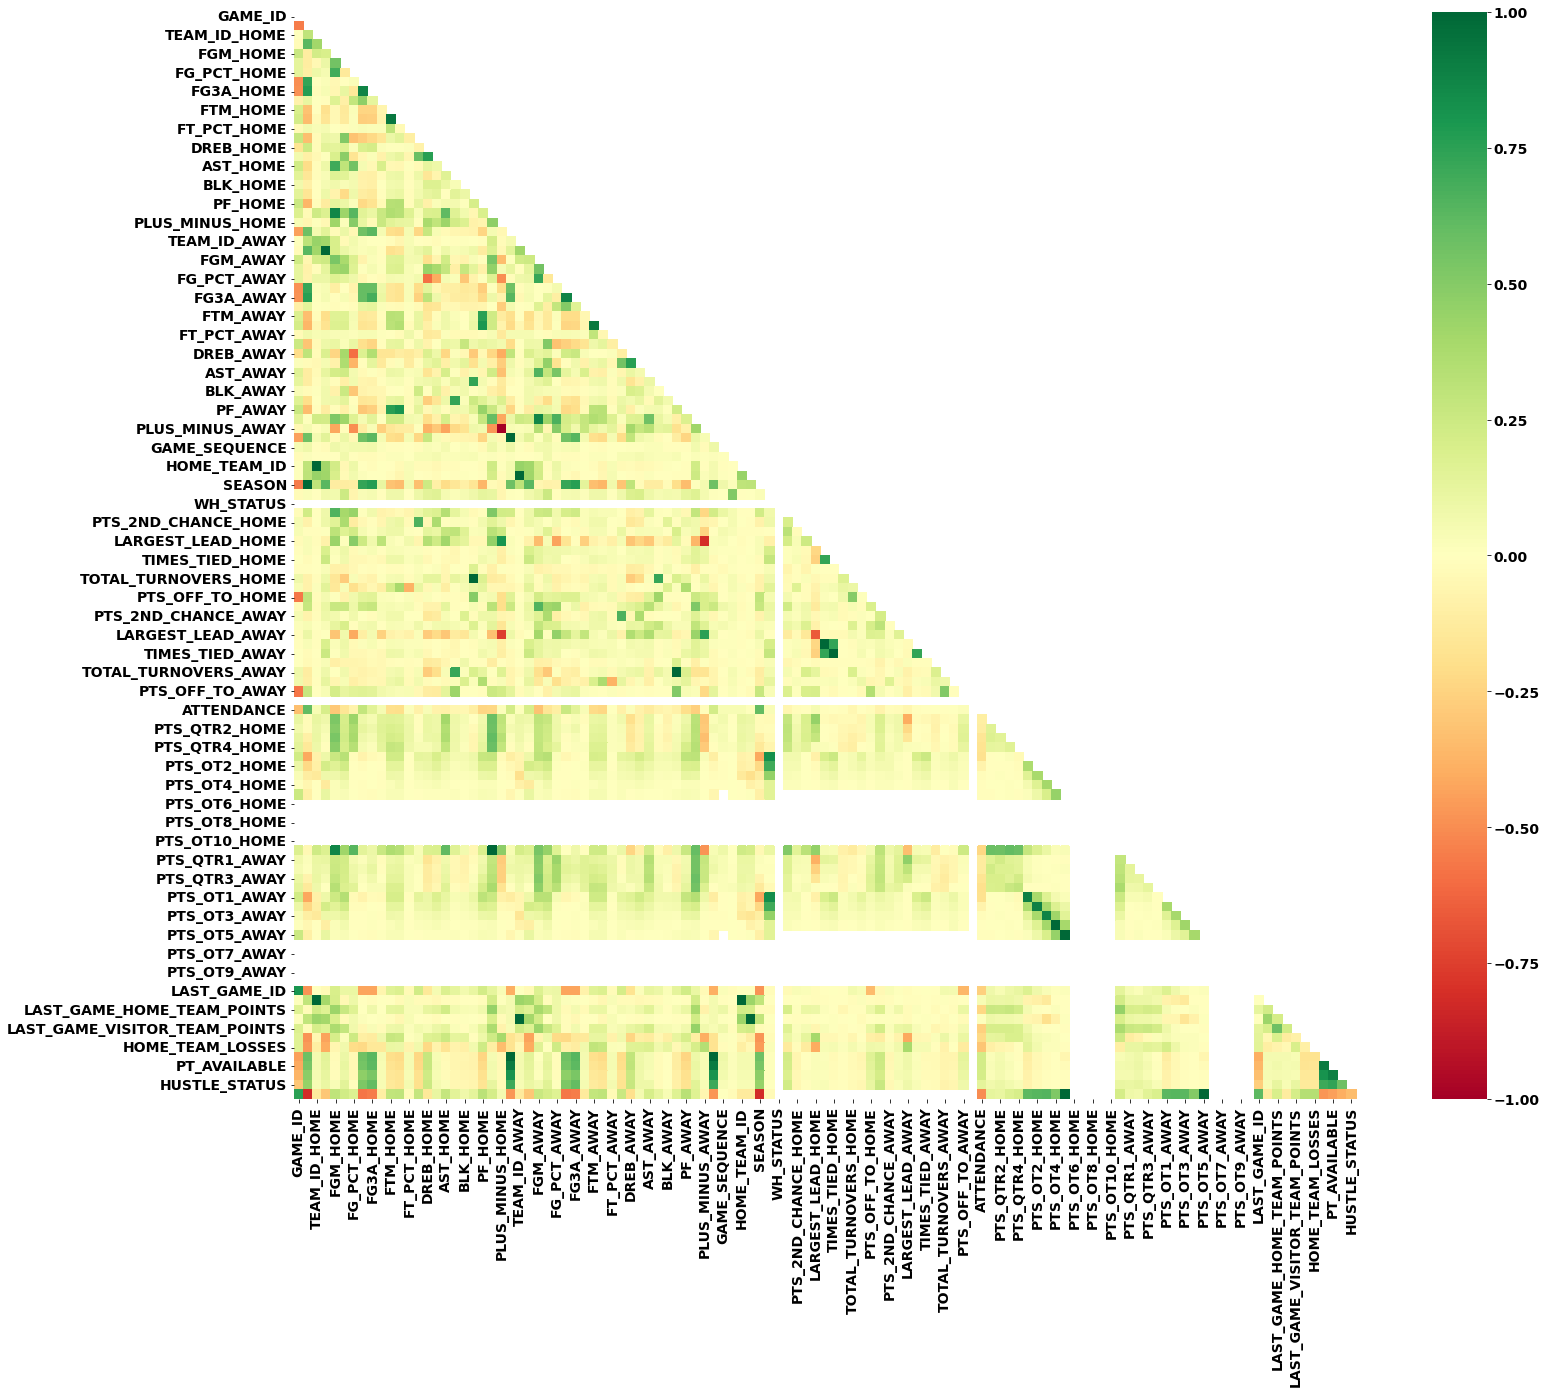

In [ ]:
# pre analyses variables
plt.figure(figsize=(24,20))
matrice  =  np . triu ( df. corr ())
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=False, mask=matrix, cmap="RdYlGn")
plt.show();

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62448 entries, 0 to 62447
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SEASON_ID                      62448 non-null  int64  
 1   TEAM_ID_HOME                   62448 non-null  int64  
 2   TEAM_ABBREVIATION_HOME         62448 non-null  object 
 3   GAME_DATE                      62448 non-null  object 
 4   WL_HOME                        62408 non-null  object 
 5   MIN_HOME                       62448 non-null  int64  
 6   FG_PCT_HOME                    44548 non-null  float64
 7   FG3_PCT_HOME                   41142 non-null  float64
 8   FT_PCT_HOME                    59409 non-null  float64
 9   OREB_HOME                      41240 non-null  float64
 10  DREB_HOME                      41171 non-null  float64
 11  REB_HOME                       44340 non-null  float64
 12  AST_HOME                       44204 non-null 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

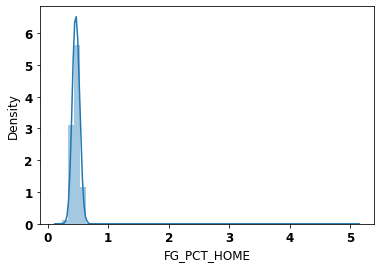

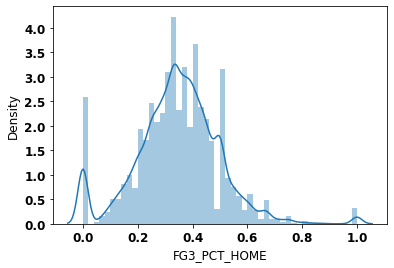

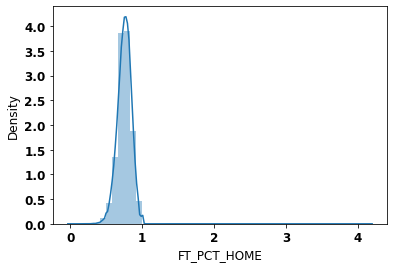

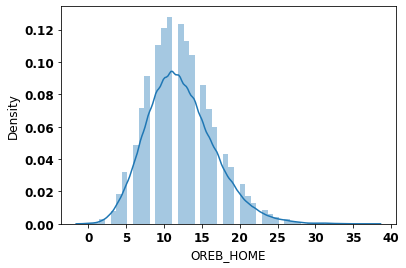

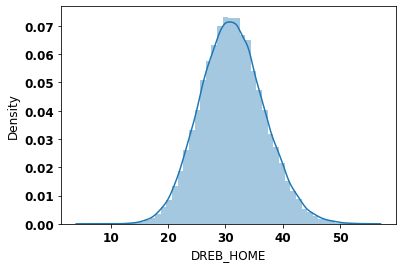

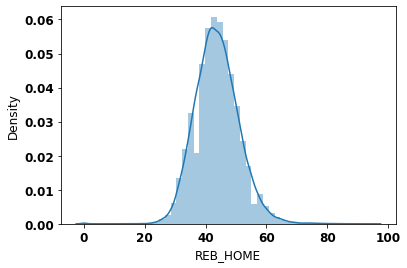

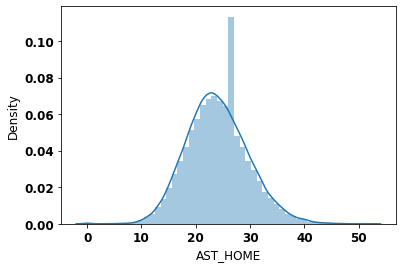

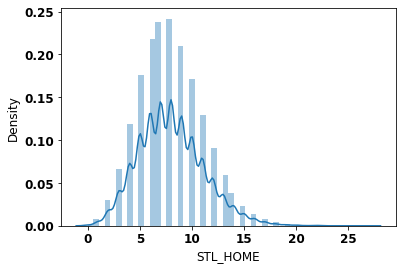

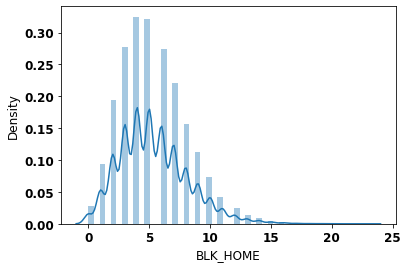

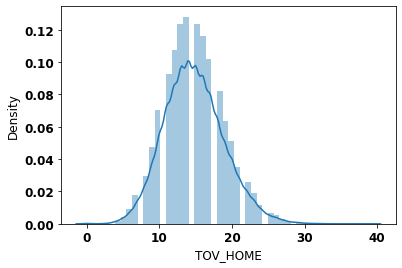

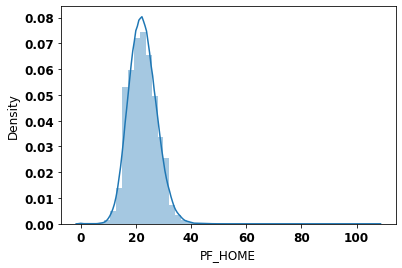

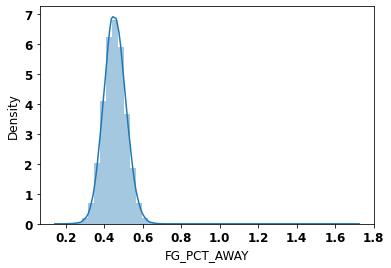

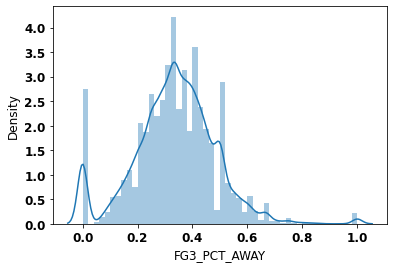

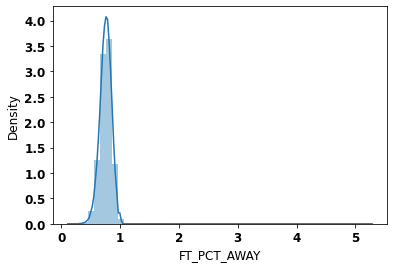

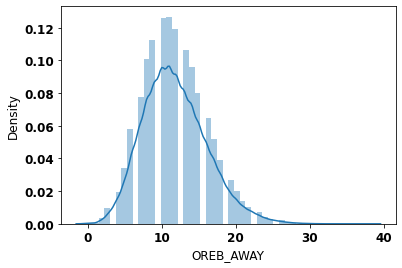

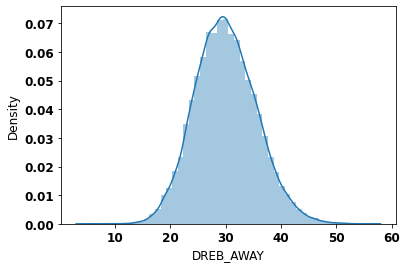

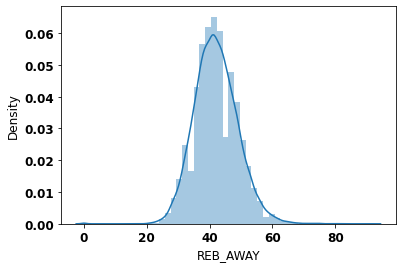

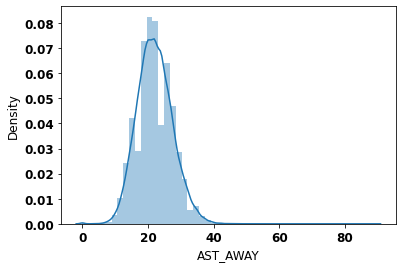

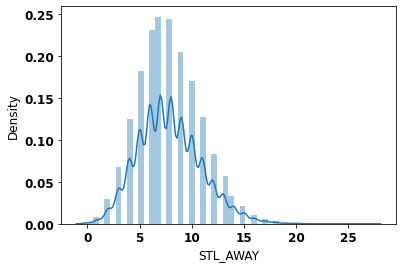

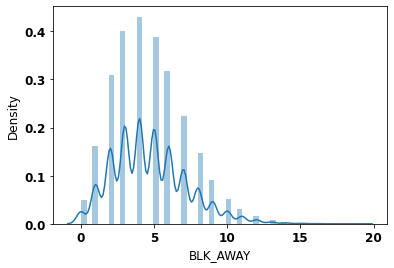

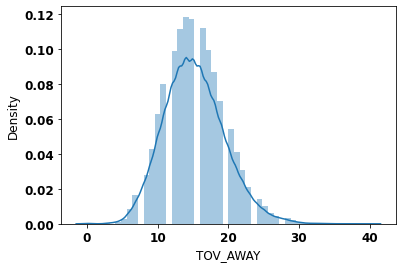

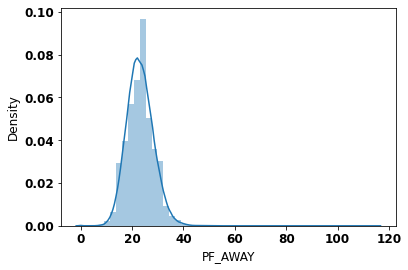

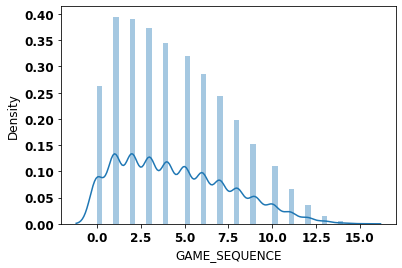

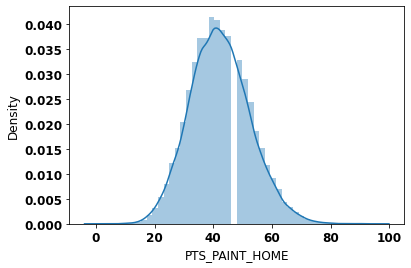

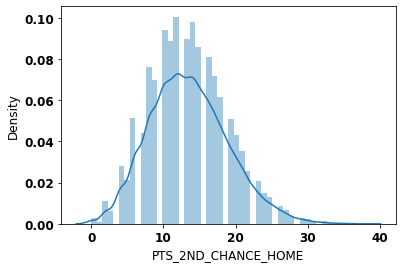

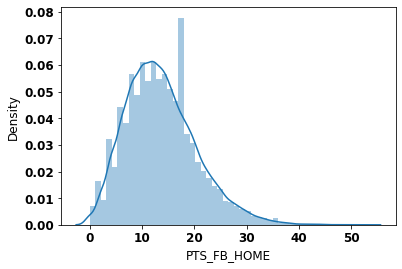

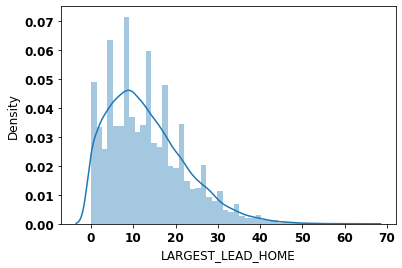

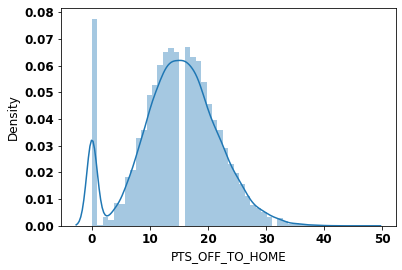

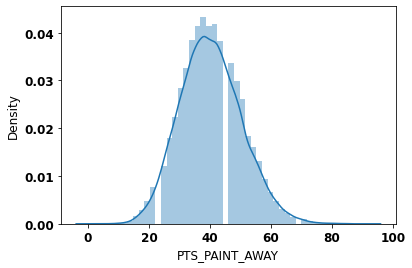

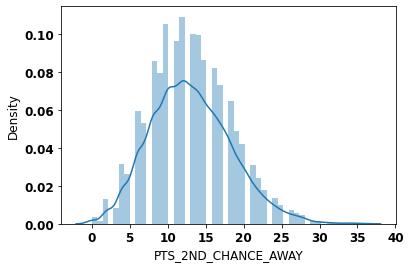

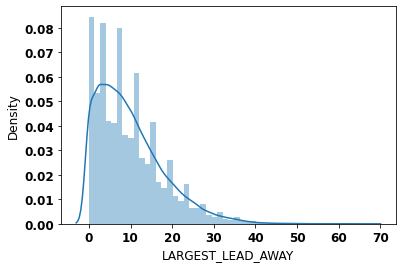

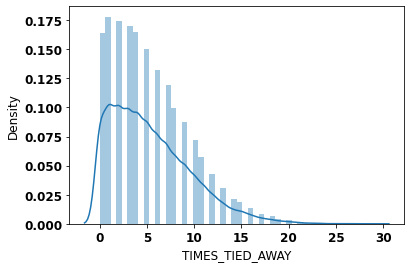

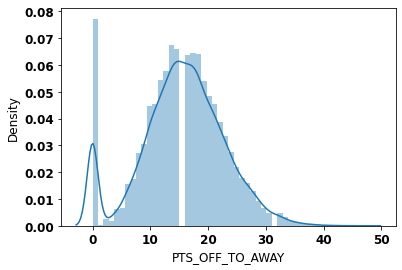

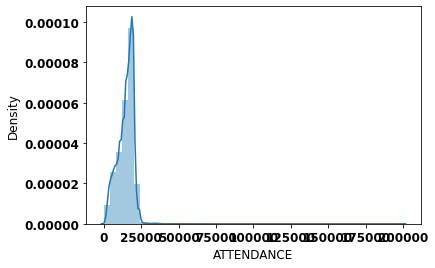

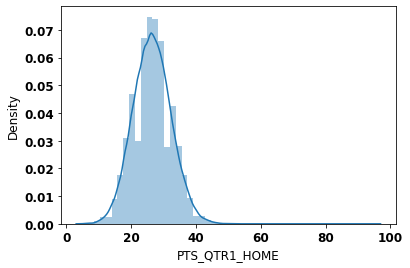

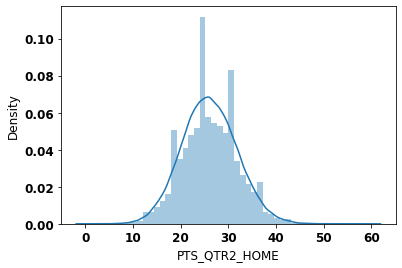

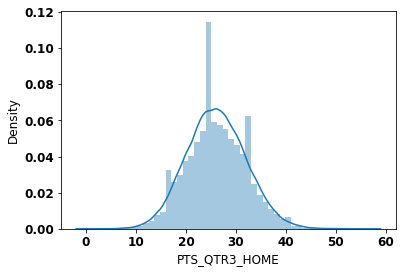

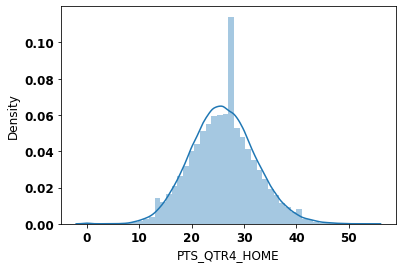

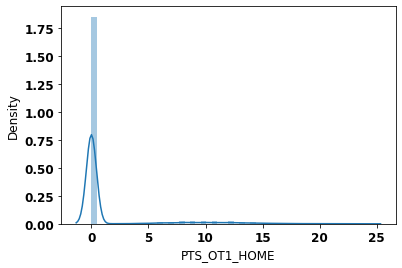

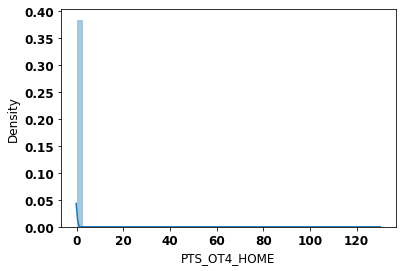

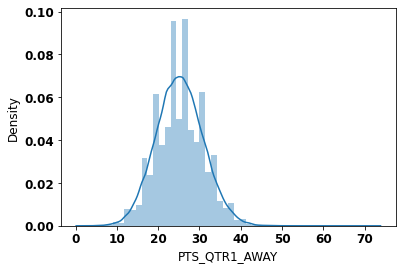

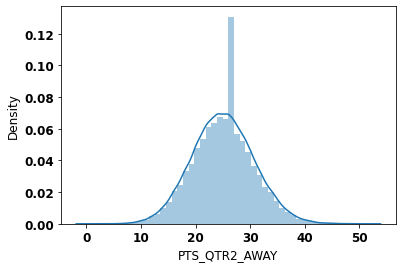

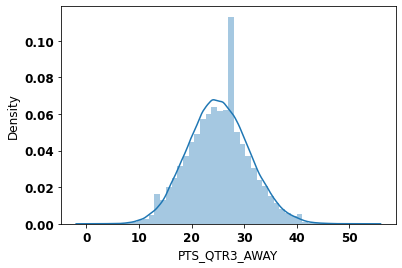

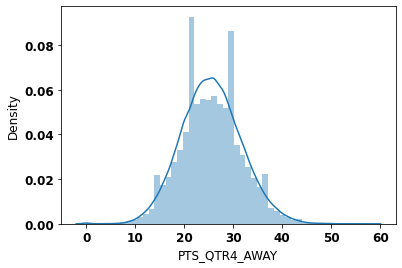

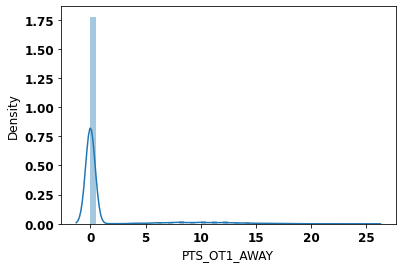

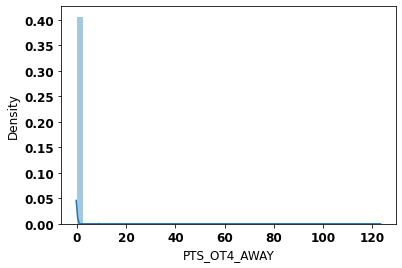

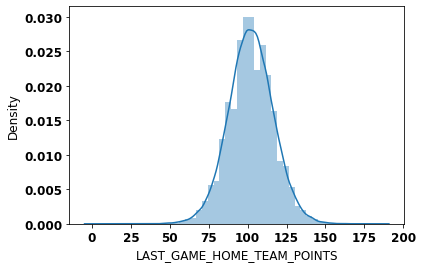

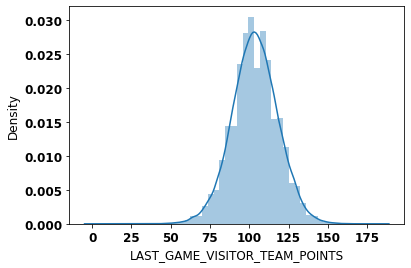

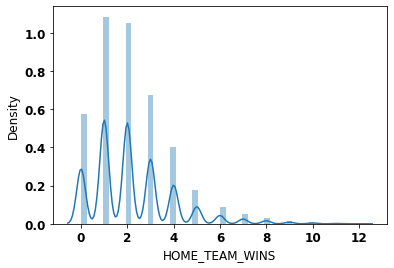

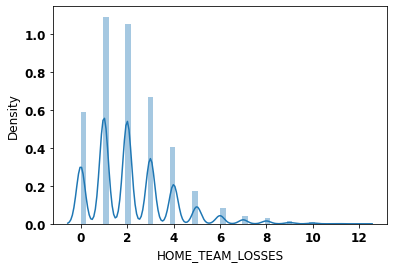

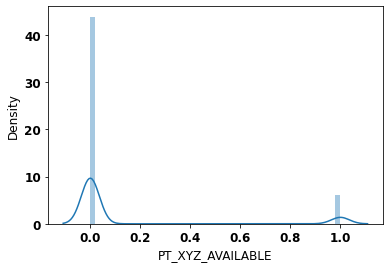

In [ ]:
#HISTOGRAMMES DES VARIABLES CONTINUES (OPTIONNEL)
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

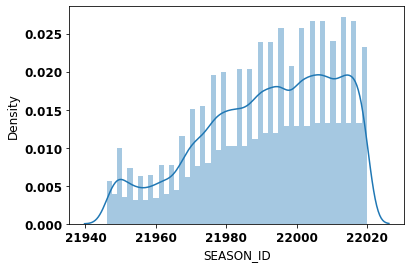

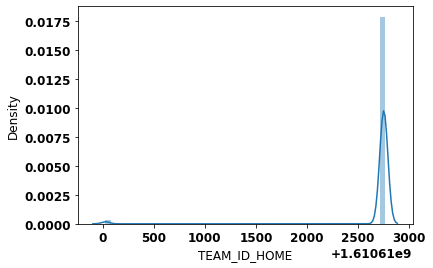

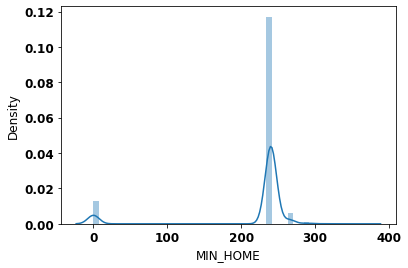

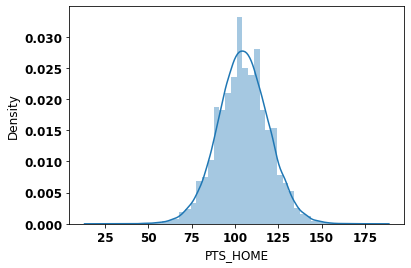

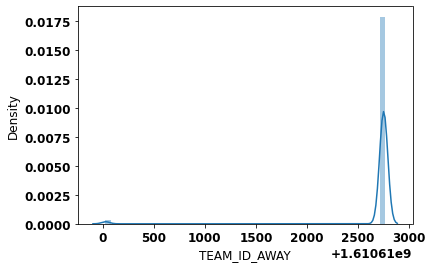

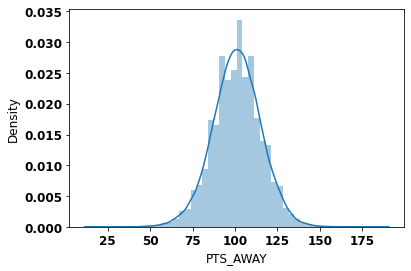

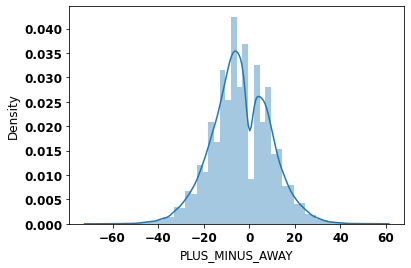

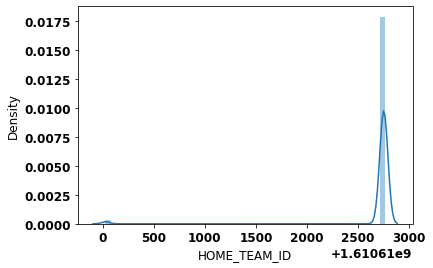

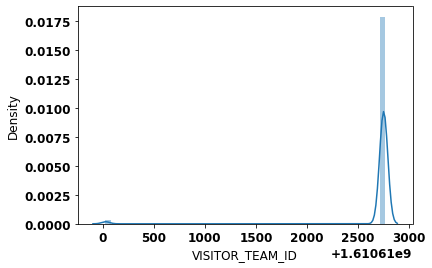

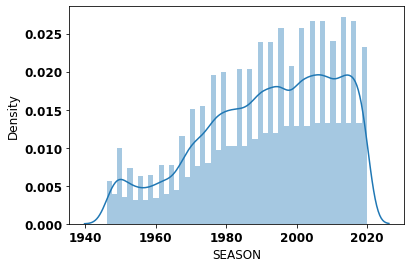

In [ ]:
for col in df.select_dtypes('int'):
    plt.figure()
    sns.distplot(df[col])

In [ ]:
# ANALYSE DES VARIABLES QUALITATIVES
for col in df.select_dtypes('object'):
    print(f'{col :-<30} {df[col].unique()}','\n \n')

TEAM_ABBREVIATION_HOME-------- ['HUS' 'BOM' 'CHS' 'PRO' 'DEF' 'CLR' 'PIT' 'BOS' 'PHW' 'NYK' 'WAS' 'BAL'
 'JET' 'FTW' 'ROC' 'MNL' 'TCB' 'INO' 'WAT' 'SYR' 'SHE' 'AND' 'DN' 'MIH'
 'STL' 'DET' 'CIN' 'LAL' 'CHP' 'CHZ' 'SFW' 'BLT' 'PHL' 'CHI' 'SDR' 'SEA'
 'ATL' 'MIL' 'PHX' 'BUF' 'POR' 'CLE' 'HOU' 'GOS' 'KCK' 'CAP' 'NOJ' 'IND'
 'DEN' 'SAN' 'NYN' 'NJN' 'SDC' 'UTH' 'DAL' 'LAC' 'SAC' 'CHH' 'MIA' 'ORL'
 'MIN' 'TOR' 'VAN' 'UTA' 'PHI' 'GSW' 'SAS' 'MEM' 'NOH' 'CHA' 'NOK' 'OKC'
 'BKN' 'NOP'] 
 

GAME_DATE--------------------- ['1946-11-01' '1946-11-02' '1946-11-03' ... '2021-05-14' '2021-05-15'
 '2021-05-16'] 
 

WL_HOME----------------------- ['L' 'W' nan] 
 

TEAM_ABBREVIATION_AWAY-------- ['NYK' 'PIT' 'BOS' 'WAS' 'HUS' 'CHS' 'BOM' 'DEF' 'PRO' 'CLR' 'PHW' 'BAL'
 'MNL' 'JET' 'FTW' 'ROC' 'DN' 'SHE' 'TCB' 'INO' 'WAT' 'SYR' 'AND' 'MIH'
 'STL' 'DET' 'CIN' 'LAL' 'CHP' 'CHZ' 'SFW' 'PHL' 'BLT' 'CHI' 'SEA' 'SDR'
 'MIL' 'PHX' 'ATL' 'CLE' 'POR' 'BUF' 'GOS' 'HOU' 'KCK' 'CAP' 'NOJ' 'NYN'
 'SAN' 'DEN' 'IND' 'NJN

In [ ]:
# columns to drop 
df = df.drop(['GAME_ID','TEAM_NAME_HOME','MATCHUP_HOME','FGM_HOME','FGA_HOME','FG3M_HOME','FG3A_HOME','FTM_HOME','FTA_HOME','PLUS_MINUS_HOME','VIDEO_AVAILABLE_HOME','TEAM_NAME_AWAY',
'MATCHUP_AWAY','MIN_AWAY','FGM_AWAY','FGA_AWAY','FG3M_AWAY','FG3A_AWAY','FTM_AWAY','FTA_AWAY','VIDEO_AVAILABLE_AWAY','GAME_STATUS_ID','GAMECODE','LIVE_PERIOD','LIVE_PC_TIME','NATL_TV_BROADCASTER_ABBREVIATION',
'LIVE_PERIOD_TIME_BCAST','WH_STATUS','TEAM_CITY_HOME','LEAD_CHANGES_HOME','TIMES_TIED_HOME','TEAM_TURNOVERS_HOME','TOTAL_TURNOVERS_HOME','TEAM_REBOUNDS_HOME','TEAM_CITY_AWAY','PTS_FB_AWAY','LEAD_CHANGES_AWAY',
'TEAM_TURNOVERS_AWAY','TOTAL_TURNOVERS_AWAY','TEAM_REBOUNDS_AWAY','LEAGUE_ID','GAME_DATE_DAY','TEAM_CITY_NAME_HOME','TEAM_NICKNAME_HOME','PTS_OT2_HOME','PTS_OT3_HOME','PTS_OT5_HOME','PTS_OT6_HOME','PTS_OT7_HOME',
'PTS_OT8_HOME','PTS_OT9_HOME','PTS_OT10_HOME','PTS_HOME_y', 'TEAM_CITY_NAME_AWAY','TEAM_NICKNAME_AWAY','PTS_OT2_AWAY','PTS_OT3_AWAY','PTS_OT5_AWAY','PTS_OT6_AWAY','PTS_OT7_AWAY','PTS_OT8_AWAY','PTS_OT9_AWAY',
'PTS_OT10_AWAY','LAST_GAME_ID','LAST_GAME_HOME_TEAM_ID','LAST_GAME_HOME_TEAM_CITY','LAST_GAME_HOME_TEAM_ABBREVIATION','LAST_GAME_VISITOR_TEAM_ID','LAST_GAME_VISITOR_TEAM_CITY','LAST_GAME_VISITOR_TEAM_CITY1','SERIES_LEADER',
'VIDEO_AVAILABLE_FLAG','PT_AVAILABLE','HUSTLE_STATUS','HISTORICAL_STATUS','GAME_DATE_EST'],axis=1)

In [ ]:
df.info() # nouveau df de départ après supression des colonnes <-> PREMIERE BOUCLE ANALYSE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62448 entries, 0 to 62447
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SEASON_ID                      62448 non-null  int64  
 1   TEAM_ID_HOME                   62448 non-null  int64  
 2   TEAM_ABBREVIATION_HOME         62448 non-null  object 
 3   GAME_DATE                      62448 non-null  object 
 4   WL_HOME                        62408 non-null  object 
 5   MIN_HOME                       62448 non-null  int64  
 6   FG_PCT_HOME                    44548 non-null  float64
 7   FG3_PCT_HOME                   41142 non-null  float64
 8   FT_PCT_HOME                    59409 non-null  float64
 9   OREB_HOME                      41240 non-null  float64
 10  DREB_HOME                      41171 non-null  float64
 11  REB_HOME                       44340 non-null  float64
 12  AST_HOME                       44204 non-null 

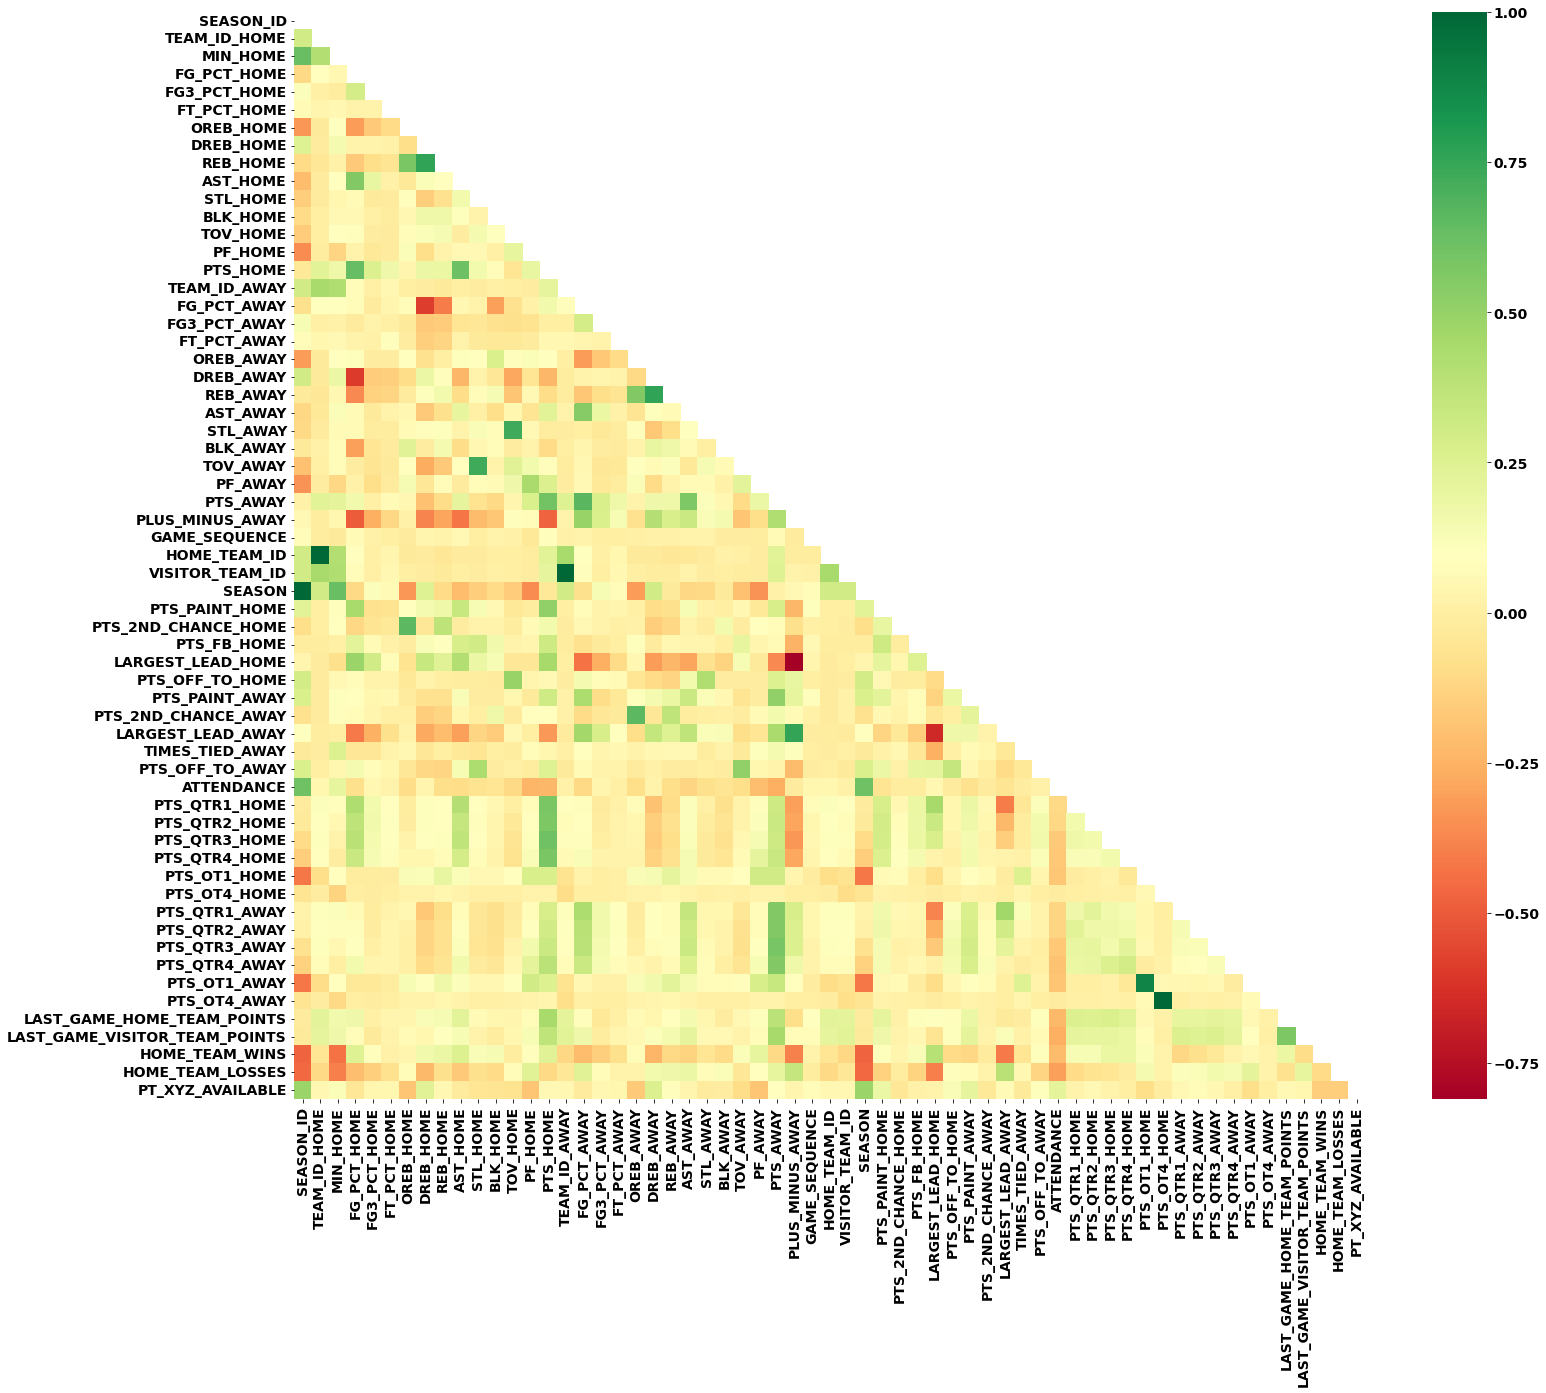

In [ ]:
# Nouvelle observation des corrélations après nettoyage 1
# pre analyses variables
plt.figure(figsize=(24,20))
matrice  =  np . triu ( df. corr ())
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=False, mask=matrix, cmap="RdYlGn")
plt.show();

In [ ]:
# copie du df avant tests de festure engineering
df_bis=df.copy()

In [ ]:
df_bis.head()

SEASON_ID  TEAM_ID_HOME TEAM_ABBREVIATION_HOME   GAME_DATE WL_HOME  \
0      21946    1610610035                    HUS  1946-11-01       L   
1      21946    1610610034                    BOM  1946-11-02       W   
2      21946    1610610025                    CHS  1946-11-02       W   
3      21946    1610610032                    PRO  1946-11-02       W   
4      21946    1610610028                    DEF  1946-11-02       L   

   MIN_HOME  FG_PCT_HOME  FG3_PCT_HOME  FT_PCT_HOME  OREB_HOME  DREB_HOME  \
0         0          NaN           NaN        0.552        NaN        NaN   
1         0        0.339           NaN          NaN        NaN        NaN   
2         0          NaN           NaN          NaN        NaN        NaN   
3         0          NaN           NaN          NaN        NaN        NaN   
4         0          NaN           NaN          NaN        NaN        NaN   

   REB_HOME  AST_HOME  STL_HOME  BLK_HOME  TOV_HOME  PF_HOME  PTS_HOME  \
0       NaN       NaN       NaN       NaN       NaN      NaN        66   
1       NaN       NaN       NaN       NaN       NaN     21.0        56   
2       NaN       NaN       NaN       NaN       NaN     20.0        63   
3       NaN       NaN       NaN       NaN       NaN      NaN        59   
4       NaN       NaN       NaN       NaN       NaN      NaN        33   

   TEAM_ID_AWAY TEAM_ABBREVIATION_AWAY WL_AWAY  FG_PCT_AWAY  FG3_PCT_AWAY  \
0    1610612752                    NYK       W          NaN           NaN   
1    1610610031                    PIT       L        0.222           NaN   
2    1610612752                    NYK       L          NaN           NaN   
3    1610612738                    BOS       L          NaN           NaN   
4    1610610036                    WAS       W          NaN           NaN   

   FT_PCT_AWAY  OREB_AWAY  DREB_AWAY  REB_AWAY  AST_AWAY  STL_AWAY  BLK_AWAY  \
0        0.769        NaN        NaN       NaN       NaN       NaN       NaN   
1          NaN        NaN        NaN       NaN       NaN       NaN       NaN   
2          NaN        NaN        NaN       NaN       NaN       NaN       NaN   
3          NaN        NaN        NaN       NaN       NaN       NaN       NaN   
4          NaN        NaN        NaN       NaN       NaN       NaN       NaN   

   TOV_AWAY  PF_AWAY  PTS_AWAY  PLUS_MINUS_AWAY  GAME_SEQUENCE  \
0       NaN      NaN        68                2            NaN   
1       NaN     25.0        51               -5            NaN   
2       NaN     22.0        47              -16            NaN   
3       NaN      NaN        53               -6            NaN   
4       NaN      NaN        50               17            NaN   

  GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  PTS_PAINT_HOME  \
0              NaN    1610610035       1610612752    1946             NaN   
1              NaN    1610610034       1610610031    1946             NaN   
2              NaN    1610610025       1610612752    1946             NaN   
3              NaN    1610610032       1610612738    1946             NaN   
4              NaN    1610610028       1610610036    1946             NaN   

   PTS_2ND_CHANCE_HOME  PTS_FB_HOME  LARGEST_LEAD_HOME  PTS_OFF_TO_HOME  \
0                  NaN          NaN                NaN              NaN   
1                  NaN          NaN                NaN              NaN   
2                  NaN          NaN                NaN              NaN   
3                  NaN          NaN                NaN              NaN   
4                  NaN          NaN                NaN              NaN   

   PTS_PAINT_AWAY  PTS_2ND_CHANCE_AWAY  LARGEST_LEAD_AWAY  TIMES_TIED_AWAY  \
0             NaN                  NaN                NaN              NaN   
1             NaN                  NaN                NaN              NaN   
2             NaN                  NaN                NaN              NaN   
3             NaN                  NaN                NaN              NaN   
4          

In [ ]:
import datetime

In [ ]:
df_bis['GAME_DATE'] = pd.to_datetime(df_bis.GAME_DATE)

In [ ]:
df_bis['LAST_GAME_DATE_EST'] = pd.to_datetime(df_bis.LAST_GAME_DATE_EST)

In [ ]:
df_bis['TimeBtw2Games'] = df_bis['GAME_DATE'] - df_bis['LAST_GAME_DATE_EST']

In [ ]:
df_bis['TimeBtw2Games']

0                      NaT
1                      NaT
2                      NaT
3                      NaT
4                      NaT
5                      NaT
6                      NaT
7                      NaT
8                      NaT
9                      NaT
10                     NaT
11                     NaT
12                     NaT
13                     NaT
14                     NaT
15                     NaT
16                     NaT
17                     NaT
18         9 days 00:00:00
19         2 days 00:00:00
20         8 days 00:00:00
21                     NaT
22                     NaT
23                     NaT
24                     NaT
25                     NaT
26                     NaT
27         3 days 00:00:00
28                     NaT
29                     NaT
30                     NaT
31                     NaT
32                     NaT
33                     NaT
34        16 days 00:00:00
35         9 days 00:00:00
36        11 days 00:00:00
3

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


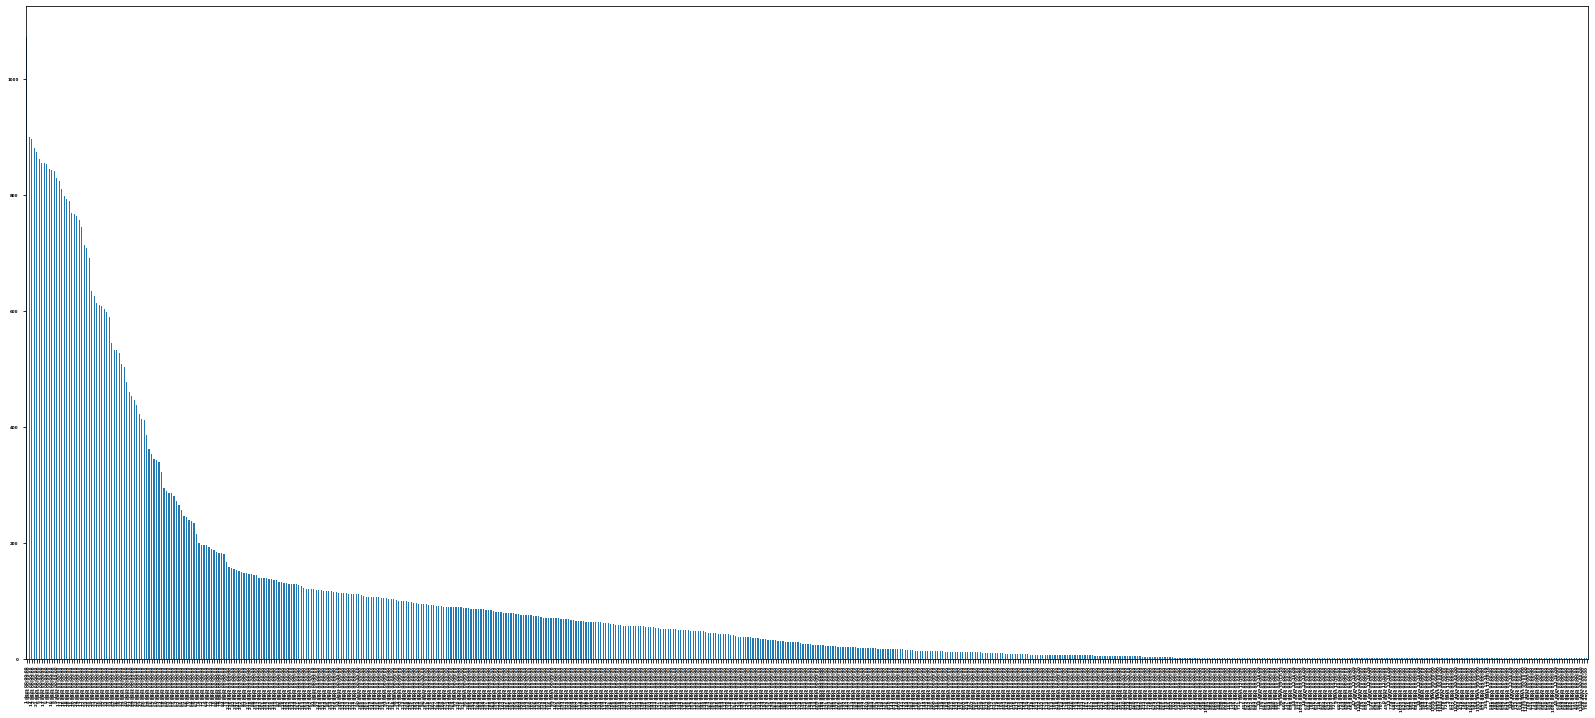

In [ ]:
plt.figure(figsize=(28,12))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 4}

plt.rc('font', **font)
df_bis['TimeBtw2Games'].value_counts().plot(kind='bar');

In [ ]:
df_bis.sample(10)

SEASON_ID  TEAM_ID_HOME TEAM_ABBREVIATION_HOME  GAME_DATE WL_HOME  \
18814      21982    1610612762                    UTH 1982-12-30       L   
58787      22017    1610612742                    DAL 2018-03-04       L   
61186      22019    1610612761                    TOR 2020-02-28       L   
19271      21982    1610612760                    SEA 1983-03-25       L   
19680      21983    1610612756                    PHX 1983-12-15       W   
42577      22004    1610612746                    LAC 2005-01-17       L   
59257      22018    1610612747                    LAL 2018-11-11       W   
10230      21972    1610612752                    NYK 1972-11-14       W   
12546      21975    1610612741                    CHI 1976-01-06       L   
55026      22014    1610612753                    ORL 2015-03-01       L   

       MIN_HOME  FG_PCT_HOME  FG3_PCT_HOME  FT_PCT_HOME  OREB_HOME  DREB_HOME  \
18814       240        0.549           NaN        0.724        NaN        NaN   
58787       240        0.444         0.435        0.760       10.0       33.0   
61186       240        0.347         0.233        0.690       14.0       31.0   
19271       240        0.473           NaN        0.640        NaN        NaN   
19680       240        0.535           NaN        0.778        NaN        NaN   
42577       240        0.319         0.000        0.852       19.0       36.0   
59257       240        0.424         0.368        0.625       17.0       31.0   
10230       240          NaN           NaN        0.929        NaN        NaN   
12546       240          NaN           NaN        0.824        NaN        NaN   
55026       240        0.365         0.400        0.750       10.0       34.0   

       REB_HOME  AST_HOME  STL_HOME  BLK_HOME  TOV_HOME  PF_HOME  PTS_HOME  \
18814      42.0      30.0       NaN       NaN       NaN     15.0       114   
58787      43.0      25.0       5.0       2.0      12.0     20.0       109   
61186      45.0      19.0      11.0       3.0       5.0     25.0        96   
19271      41.0      33.0       NaN       NaN       NaN     25.0       104   
19680      32.0      35.0       NaN       NaN       NaN     20.0       114   
42577      55.0      16.0       7.0       7.0      10.0     25.0        83   
59257      48.0      28.0      12.0       9.0      23.0     23.0       107   
10230       NaN       NaN       NaN       NaN       NaN     23.0       103   
12546       NaN       NaN       NaN       NaN       NaN     27.0        98   
55026      44.0      16.0       8.0       3.0      11.0     19.0        83   

       TEAM_ID_AWAY TEAM_ABBREVIATION_AWAY WL_AWAY  FG_PCT_AWAY  FG3_PCT_AWAY  \
18814    1610612754                    IND       W        0.530           NaN   
58787    1610612740                    NOP       W        0.538         0.462   
61186    1610612766                    CHA       W        0.436         0.433   
19271    1610612745                    HOU       W        0.442           NaN   
19680    1610612747                    LAL       L        0.500           NaN   
42577    1610612758                    SAC       W        0.436         0.417   
59257    1610612737                    ATL       L        0.432         0.351   
10230    1610612756                    PHX       L          NaN           NaN   
12546    1610612762                    NOJ       W          NaN           NaN   
55026    1610612766                    CHA       W        0.500         0.444   

       FT_PCT_AWAY  OREB_AWAY  DREB_AWAY  REB_AWAY  AST_AWAY  STL_AWAY  \
18814        0.800        NaN        NaN      42.0      33.0       NaN   
58787        0.762        6.0       41.0      47.0      27.0       9.0   
61186        0.720       11.0       47.0      58.0      23.0       3.0   
19271        0.647        NaN        NaN      51.0      23.0       NaN   
19680        0.783        NaN        NaN      45.0      14.0       NaN   
42577        0.667        7.0       41.0      48.0      22.0       8.0   
59257    

In [ ]:
df_bis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62448 entries, 0 to 62447
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   SEASON_ID                      62448 non-null  int64          
 1   TEAM_ID_HOME                   62448 non-null  int64          
 2   TEAM_ABBREVIATION_HOME         62448 non-null  object         
 3   GAME_DATE                      62448 non-null  datetime64[ns] 
 4   WL_HOME                        62408 non-null  object         
 5   MIN_HOME                       62448 non-null  int64          
 6   FG_PCT_HOME                    44548 non-null  float64        
 7   FG3_PCT_HOME                   41142 non-null  float64        
 8   FT_PCT_HOME                    59409 non-null  float64        
 9   OREB_HOME                      41240 non-null  float64        
 10  DREB_HOME                      41171 non-null  float64        
 11  RE

In [ ]:
x=df_bis['GAME_DATE']
y=df_bis['FG_PCT_AWAY']
y2=df_bis['FG_PCT_HOME']

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


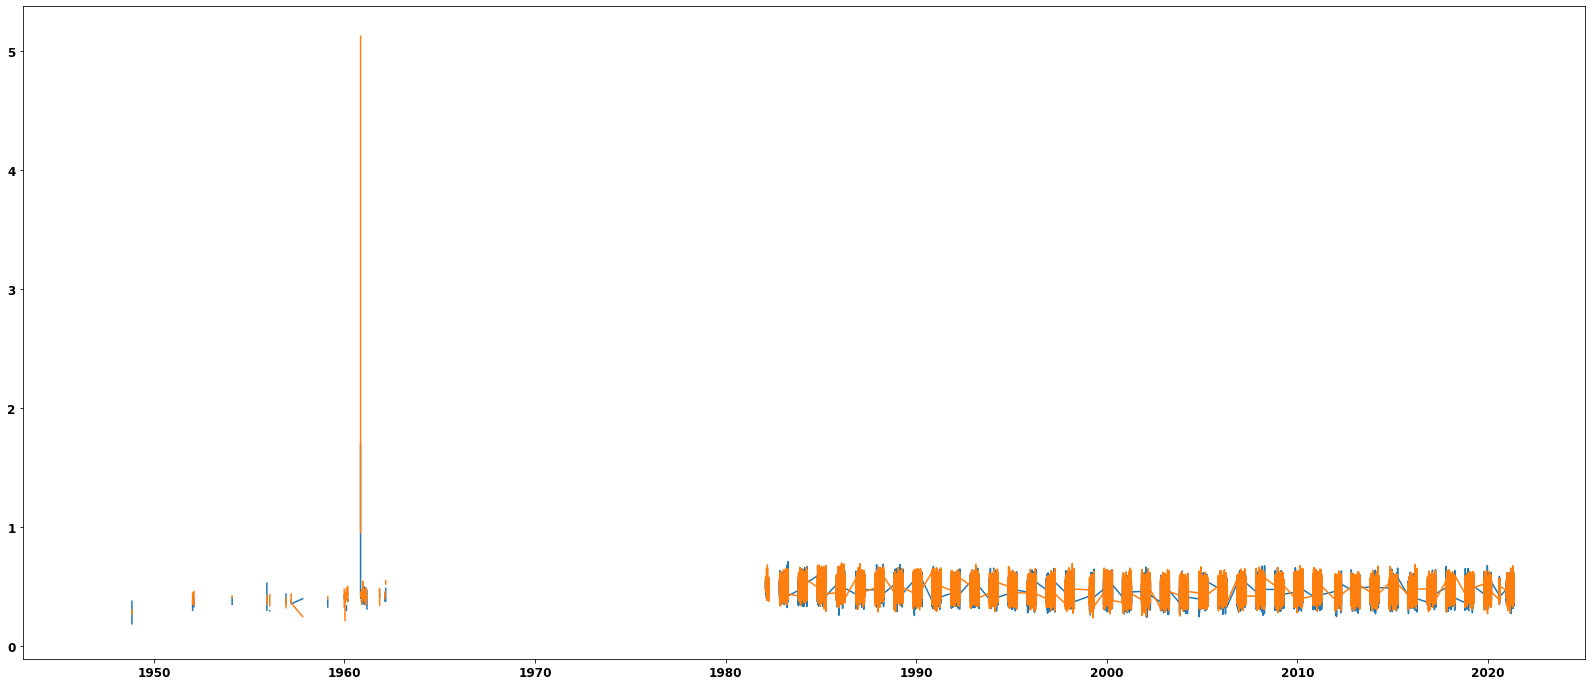

In [ ]:
# test de graph temporel
plt.figure(figsize=(28,12))
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)
plt.plot(x,y)
plt.plot(x,y2)

''

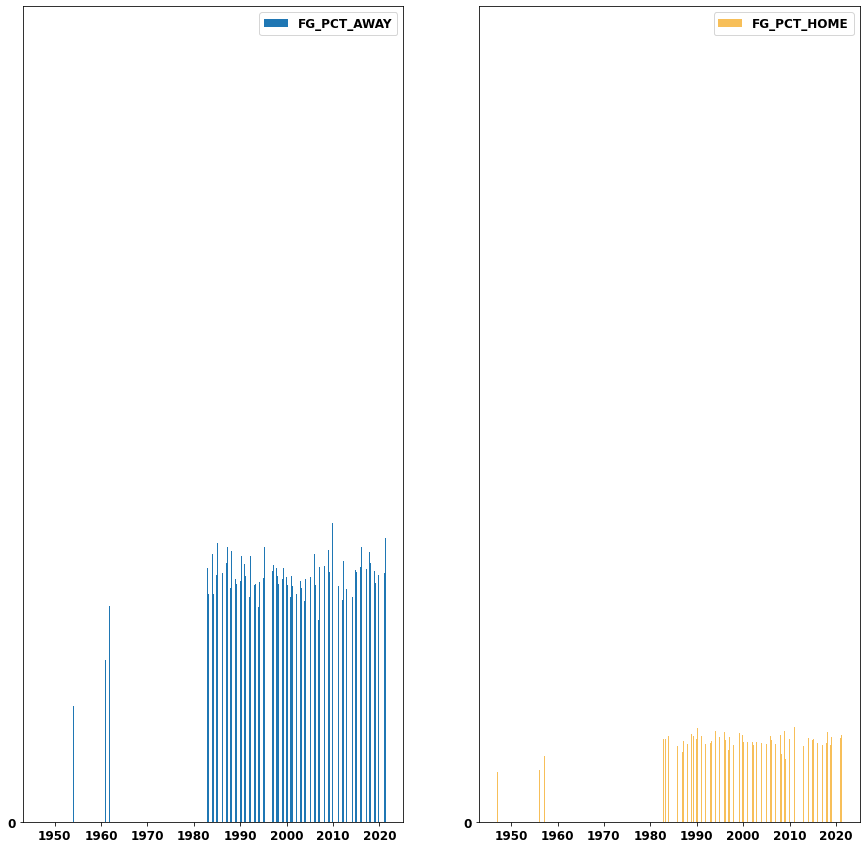

In [ ]:
plt.figure( figsize= (15, 15) )
plt.subplot(121)
plt.bar(df_bis['GAME_DATE'],df_bis['FG_PCT_AWAY'], label = "FG_PCT_AWAY")
plt.yticks(range(0,1))
plt.legend()
plt.subplot(122)
plt.bar(df_bis['GAME_DATE'],df_bis['FG_PCT_HOME'], color = ['#f7bf59'], label = "FG_PCT_HOME")
plt.yticks(range(0,1))
plt.legend()
;

# RESTRICTION ARBITRAIRE HISTORIQUE DATAFRAME -> +/- 20 DERNIERES ANNEES

In [ ]:
df_ter = df_bis.iloc[38500:,:] # choix arbitraire de selection des 20 dernières années

In [ ]:
df_ter.head()

SEASON_ID  TEAM_ID_HOME TEAM_ABBREVIATION_HOME  GAME_DATE WL_HOME  \
38500      22001    1610612741                    CHI 2001-11-03       W   
38501      22001    1610612757                    POR 2001-11-03       L   
38502      22001    1610612760                    SEA 2001-11-03       L   
38503      22001    1610612749                    MIL 2001-11-03       W   
38504      22001    1610612739                    CLE 2001-11-03       L   

       MIN_HOME  FG_PCT_HOME  FG3_PCT_HOME  FT_PCT_HOME  OREB_HOME  DREB_HOME  \
38500       240        0.413         0.308        0.750        4.0       37.0   
38501       240        0.402         0.300        0.783        7.0       30.0   
38502       240        0.389         0.286        0.737       10.0       19.0   
38503       240        0.453         0.353        0.912        9.0       37.0   
38504       240        0.253         0.273        0.788       15.0       35.0   

       REB_HOME  AST_HOME  STL_HOME  BLK_HOME  TOV_HOME  PF_HOME  PTS_HOME  \
38500      41.0      25.0      14.0       5.0      13.0     27.0        84   
38501      37.0      16.0       1.0       3.0      10.0     23.0        90   
38502      29.0      21.0      11.0       5.0      20.0     30.0        74   
38503      46.0      24.0       7.0       5.0      12.0     19.0       105   
38504      50.0      14.0       3.0       5.0      17.0     22.0        69   

       TEAM_ID_AWAY TEAM_ABBREVIATION_AWAY WL_AWAY  FG_PCT_AWAY  FG3_PCT_AWAY  \
38500    1610612752                    NYK       L        0.347         0.167   
38501    1610612759                    SAS       W        0.456         0.560   
38502    1610612762                    UTA       W        0.459         0.429   
38503    1610612738                    BOS       L        0.382         0.429   
38504    1610612753                    ORL       W        0.424         0.267   

       FT_PCT_AWAY  OREB_AWAY  DREB_AWAY  REB_AWAY  AST_AWAY  STL_AWAY  \
38500        0.774       10.0       34.0      44.0      18.0       5.0   
38501        0.741       11.0       36.0      47.0      22.0       4.0   
38502        0.625       16.0       29.0      45.0      25.0      12.0   
38503        0.792       16.0       25.0      41.0      24.0       5.0   
38504        0.708       16.0       43.0      59.0      24.0       7.0   

       BLK_AWAY  TOV_AWAY  PF_AWAY  PTS_AWAY  PLUS_MINUS_AWAY  GAME_SEQUENCE  \
38500       4.0      18.0     21.0        79               -5            6.0   
38501      10.0      10.0     18.0       106               16           10.0   
38502       4.0      20.0     19.0        91               17            5.0   
38503       4.0       8.0     24.0        99               -6            7.0   
38504      12.0      10.0     26.0        99               30            3.0   

      GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  PTS_PAINT_HOME  \
38500            Final    1610612741       1610612752    2001            32.0   
38501            Final    1610612757       1610612759    2001            24.0   
38502            Final    1610612760       1610612762    2001            30.0   
38503            Final    1610612749       1610612738    2001            26.0   
38504            Final    1610612739       1610612753    2001            12.0   

       PTS_2ND_CHANCE_HOME  PTS_FB_HOME  LARGEST_LEAD_HOME  PTS_OFF_TO_HOME  \
38500                 11.0         10.0                5.0              7.0   
38501                  7.0          7.0                0.0             14.0   
38502                 10.0          3.0                4.0             26.0   
38503                 14.0          4.0               16.0             14.0   
38504                  7.0          6.0                1.0             13.0   

       PTS_PAINT_AWAY  PTS_2ND_CHANCE_AWAY  LARGEST_LEAD_AWAY  \
38500            32.0                 10.0                9.0   
38501            26.0                 13.0               23.0   
38502            54.0   

''

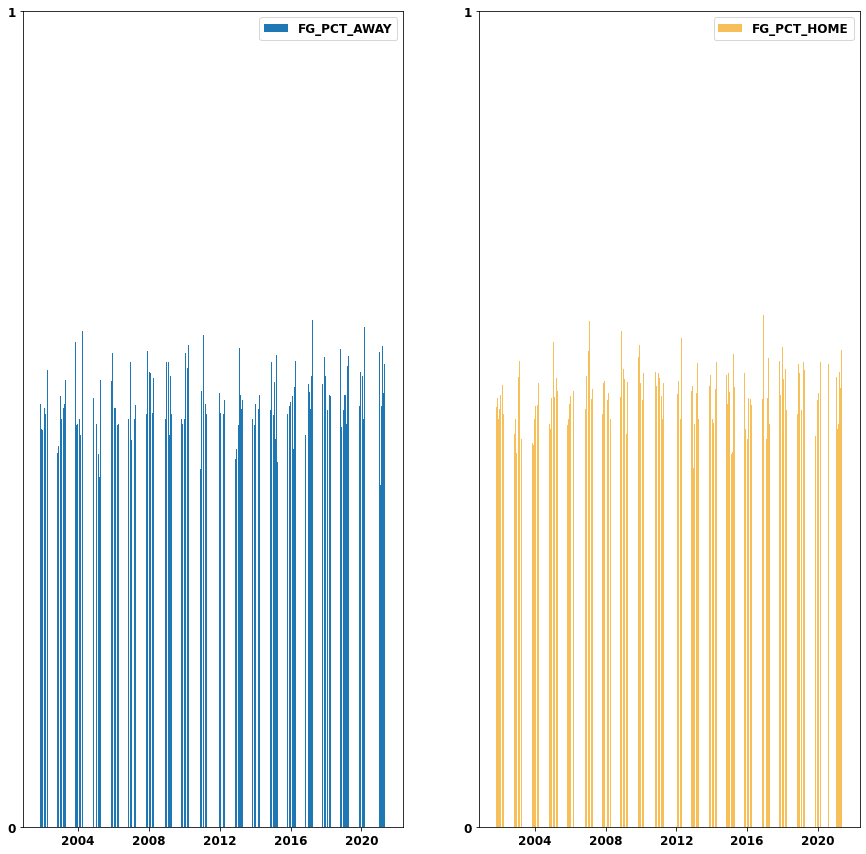

In [ ]:
plt.figure( figsize= (15, 15) )
plt.subplot(121)
plt.bar(df_ter['GAME_DATE'],df_ter['FG_PCT_AWAY'], label = "FG_PCT_AWAY")
plt.yticks(range(0,2))
plt.legend()
plt.subplot(122)
plt.bar(df_ter['GAME_DATE'],df_ter['FG_PCT_HOME'], color = ['#f7bf59'], label = "FG_PCT_HOME")
plt.yticks(range(0,2))
plt.legend()
;

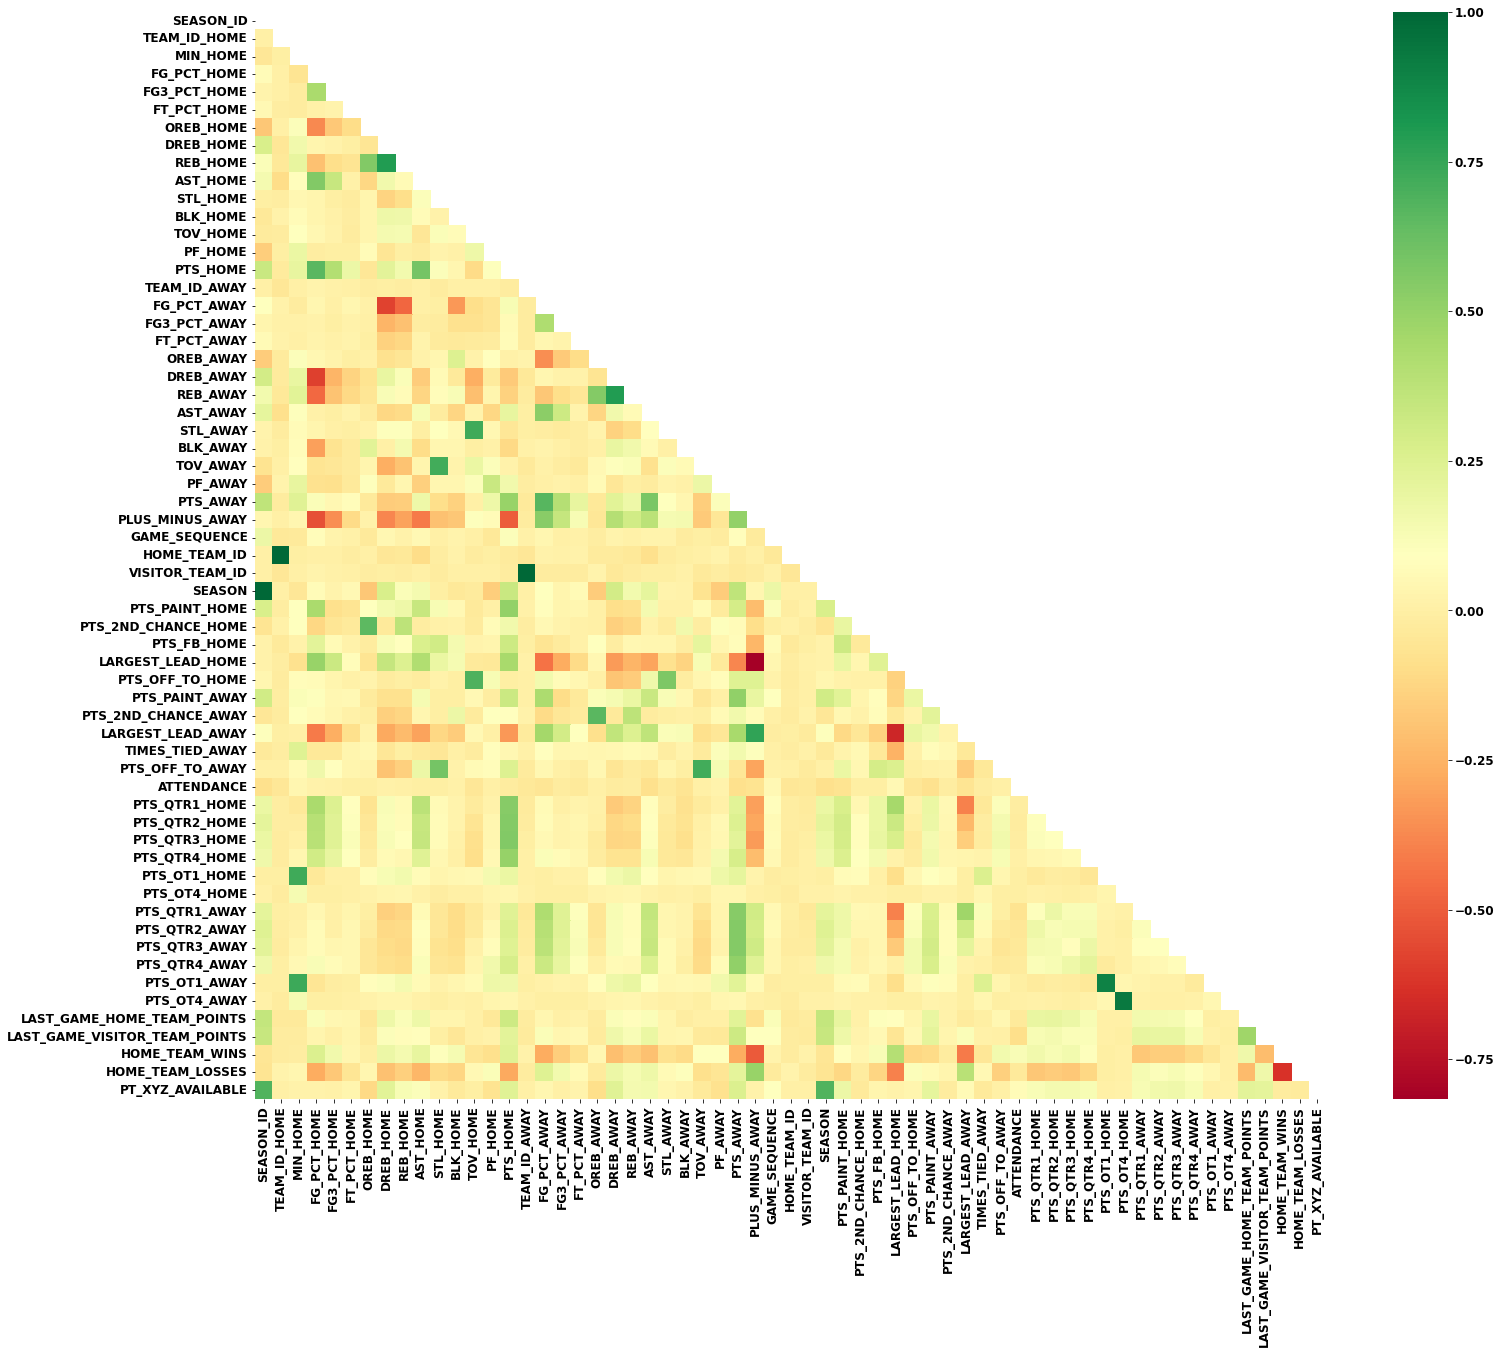

In [ ]:
# Nouvelle observation des corrélations après nettoyage 1 + RESTRICTION DATASET AUX 20 DERNIERES ANNEES
# pre analyses variables
plt.figure(figsize=(24,20))
matrice  =  np . triu ( df_ter. corr ())
matrix = np.triu(df_ter.corr())
sns.heatmap(df_ter.corr(), annot=False, mask=matrix, cmap="RdYlGn")
plt.show();

In [ ]:
# ANALYSE COMPLEMENTAIRE EN VUE DU PRROCHAIN NETTOYAGE
# Analyse croisée complémentaire des zones à correlations significatives (>0.5), montrant les mêmes tendances que les graphiques ci avant
# corr matrix pour la famille des données d'emprunts (trèes fortes corrélations)
cor = df_ter.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor_stack = cor.stack()
print("Columns with corr. greater than 0.5 ")
print(cor_stack[(cor_stack > 0.50) ])

Columns with corr. greater than 0.5 
REB_HOME             OREB_HOME          0.556285
                     DREB_HOME          0.797944
AST_HOME             FG_PCT_HOME        0.555280
PTS_HOME             FG_PCT_HOME        0.660394
                     AST_HOME           0.592748
REB_AWAY             OREB_AWAY          0.548308
                     DREB_AWAY          0.800195
AST_AWAY             FG_PCT_AWAY        0.525864
STL_AWAY             TOV_HOME           0.727598
TOV_AWAY             STL_HOME           0.722036
PTS_AWAY             FG_PCT_AWAY        0.667226
                     AST_AWAY           0.578503
PLUS_MINUS_AWAY      FG_PCT_AWAY        0.533693
                     PTS_AWAY           0.510234
HOME_TEAM_ID         TEAM_ID_HOME       1.000000
VISITOR_TEAM_ID      TEAM_ID_AWAY       1.000000
SEASON               SEASON_ID          1.000000
PTS_PAINT_HOME       PTS_HOME           0.507913
PTS_2ND_CHANCE_HOME  OREB_HOME          0.656862
PTS_OFF_TO_HOME      TOV_HOME   

In [ ]:
# recherche des NaN sur df_ter
df_ter.isna().sum()

In [ ]:
cols_with_missing = [col for col in df_ter.columns if df_ter[col].isna().any()]
len(cols_with_missing)

37

In [ ]:
# SUPPRESSION DES VALEURS MANQUANTES NAN DE TYPE OBJECT PAR LEUR MODE
# [col for col in df_ter.columns if df_ter[col].dtype=='object']
# df_ter_obj = df_ter[object_column2]
# column_mode = df_ter_obj.mode()   # ABANDON PISTE MODE
# for col in df_ter_obj:
  #df_ter_obj = df_ter_obj.dropna(object_column2)

In [ ]:
# REMPLACEMENT DES VALEURS MANQUANTES NAN DE TYPE NUMERIC PAR LEUR MOYENNE
num_column2=[col for col in df_ter.columns if df_ter[col].dtype in ['int64','float64']]

In [ ]:
df_ter_num = df_ter[num_column2]

In [ ]:
column_means = df_ter_num. mean()
column_means

SEASON_ID                        2.201044e+04
TEAM_ID_HOME                     1.610613e+09
MIN_HOME                         2.416006e+02
FG_PCT_HOME                      4.609597e-01
FG3_PCT_HOME                     3.577774e-01
FT_PCT_HOME                      7.605206e-01
OREB_HOME                        1.113680e+01
DREB_HOME                        3.211070e+01
REB_HOME                         4.324749e+01
AST_HOME                         2.280257e+01
STL_HOME                         7.604059e+00
BLK_HOME                         5.134124e+00
TOV_HOME                         1.425067e+01
PF_HOME                          2.051578e+01
PTS_HOME                         1.024202e+02
TEAM_ID_AWAY                     1.610613e+09
FG_PCT_AWAY                      4.494037e-01
FG3_PCT_AWAY                     3.497816e-01
FT_PCT_AWAY                      7.587206e-01
OREB_AWAY                        1.081447e+01
DREB_AWAY                        3.110310e+01
REB_AWAY                         4

In [ ]:
for col in df_ter:
  df_ter_num = df_ter. fillna(column_means)

In [ ]:
df_ter_num.isna().sum()

SEASON_ID                         0
TEAM_ID_HOME                      0
TEAM_ABBREVIATION_HOME            0
GAME_DATE                         0
WL_HOME                          40
MIN_HOME                          0
FG_PCT_HOME                       0
FG3_PCT_HOME                      0
FT_PCT_HOME                       0
OREB_HOME                         0
DREB_HOME                         0
REB_HOME                          0
AST_HOME                          0
STL_HOME                          0
BLK_HOME                          0
TOV_HOME                          0
PF_HOME                           0
PTS_HOME                          0
TEAM_ID_AWAY                      0
TEAM_ABBREVIATION_AWAY            0
WL_AWAY                          40
FG_PCT_AWAY                       0
FG3_PCT_AWAY                      0
FT_PCT_AWAY                       0
OREB_AWAY                         0
DREB_AWAY                         0
REB_AWAY                          0
AST_AWAY                    

In [ ]:
df_ter_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23948 entries, 38500 to 62447
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   SEASON_ID                      23948 non-null  int64          
 1   TEAM_ID_HOME                   23948 non-null  int64          
 2   TEAM_ABBREVIATION_HOME         23948 non-null  object         
 3   GAME_DATE                      23948 non-null  datetime64[ns] 
 4   WL_HOME                        23908 non-null  object         
 5   MIN_HOME                       23948 non-null  int64          
 6   FG_PCT_HOME                    23948 non-null  float64        
 7   FG3_PCT_HOME                   23948 non-null  float64        
 8   FT_PCT_HOME                    23948 non-null  float64        
 9   OREB_HOME                      23948 non-null  float64        
 10  DREB_HOME                      23948 non-null  float64        
 11

In [ ]:
# Nettoyage des lignes manquantes (données manquantes object)
df_ter_num = df_ter_num.dropna(axis=0)

In [ ]:
df_ter_num.info()

In [ ]:
df_ter_num.isna().sum()

SEASON_ID                        0
TEAM_ID_HOME                     0
TEAM_ABBREVIATION_HOME           0
GAME_DATE                        0
WL_HOME                          0
MIN_HOME                         0
FG_PCT_HOME                      0
FG3_PCT_HOME                     0
FT_PCT_HOME                      0
OREB_HOME                        0
DREB_HOME                        0
REB_HOME                         0
AST_HOME                         0
STL_HOME                         0
BLK_HOME                         0
TOV_HOME                         0
PF_HOME                          0
PTS_HOME                         0
TEAM_ID_AWAY                     0
TEAM_ABBREVIATION_AWAY           0
WL_AWAY                          0
FG_PCT_AWAY                      0
FG3_PCT_AWAY                     0
FT_PCT_AWAY                      0
OREB_AWAY                        0
DREB_AWAY                        0
REB_AWAY                         0
AST_AWAY                         0
STL_AWAY            

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


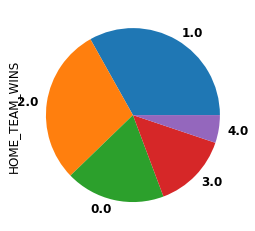

In [ ]:
# observation de la variable HOME TEAM WINS -> ATTENTION CE N'EST PAS LA VARIABLE TARGET
df_ter_num['HOME_TEAM_WINS'].value_counts().plot.pie();

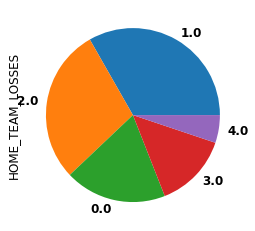

In [ ]:
# observation de la variable HOME TEAM WINS -> ATTENTION CE N'EST PAS LA VARIABLE TARGET
df_ter_num['HOME_TEAM_LOSSES'].value_counts().plot.pie();

# observation des variables TARGET

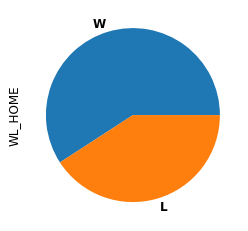

In [ ]:
df_ter_num['WL_HOME'].value_counts().plot.pie();

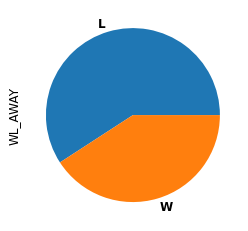

In [ ]:
df_ter_num['WL_AWAY'].value_counts().plot.pie();

# Séparations en dataset tests et entrainement

In [ ]:
df_ter_num['WL_HOME'] = df_ter_num['WL_HOME'].replace(['W','L'],[1,0]) # ou df[].map

In [ ]:
df_ter_num['WL_AWAY']=df_ter_num['WL_AWAY'].replace(['W','L'],[1,0])

In [ ]:
df_ter_num.head()

SEASON_ID  TEAM_ID_HOME TEAM_ABBREVIATION_HOME  GAME_DATE  WL_HOME  \
38500      22001    1610612741                    CHI 2001-11-03        1   
38501      22001    1610612757                    POR 2001-11-03        0   
38502      22001    1610612760                    SEA 2001-11-03        0   
38503      22001    1610612749                    MIL 2001-11-03        1   
38504      22001    1610612739                    CLE 2001-11-03        0   

       MIN_HOME  FG_PCT_HOME  FG3_PCT_HOME  FT_PCT_HOME  OREB_HOME  DREB_HOME  \
38500       240        0.413         0.308        0.750        4.0       37.0   
38501       240        0.402         0.300        0.783        7.0       30.0   
38502       240        0.389         0.286        0.737       10.0       19.0   
38503       240        0.453         0.353        0.912        9.0       37.0   
38504       240        0.253         0.273        0.788       15.0       35.0   

       REB_HOME  AST_HOME  STL_HOME  BLK_HOME  TOV_HOME  PF_HOME  PTS_HOME  \
38500      41.0      25.0      14.0       5.0      13.0     27.0        84   
38501      37.0      16.0       1.0       3.0      10.0     23.0        90   
38502      29.0      21.0      11.0       5.0      20.0     30.0        74   
38503      46.0      24.0       7.0       5.0      12.0     19.0       105   
38504      50.0      14.0       3.0       5.0      17.0     22.0        69   

       TEAM_ID_AWAY TEAM_ABBREVIATION_AWAY  WL_AWAY  FG_PCT_AWAY  \
38500    1610612752                    NYK        0        0.347   
38501    1610612759                    SAS        1        0.456   
38502    1610612762                    UTA        1        0.459   
38503    1610612738                    BOS        0        0.382   
38504    1610612753                    ORL        1        0.424   

       FG3_PCT_AWAY  FT_PCT_AWAY  OREB_AWAY  DREB_AWAY  REB_AWAY  AST_AWAY  \
38500         0.167        0.774       10.0       34.0      44.0      18.0   
38501         0.560        0.741       11.0       36.0      47.0      22.0   
38502         0.429        0.625       16.0       29.0      45.0      25.0   
38503         0.429        0.792       16.0       25.0      41.0      24.0   
38504         0.267        0.708       16.0       43.0      59.0      24.0   

       STL_AWAY  BLK_AWAY  TOV_AWAY  PF_AWAY  PTS_AWAY  PLUS_MINUS_AWAY  \
38500       5.0       4.0      18.0     21.0        79               -5   
38501       4.0      10.0      10.0     18.0       106               16   
38502      12.0       4.0      20.0     19.0        91               17   
38503       5.0       4.0       8.0     24.0        99               -6   
38504       7.0      12.0      10.0     26.0        99               30   

       GAME_SEQUENCE GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  \
38500            6.0            Final    1610612741       1610612752    2001   
38501           10.0            Final    1610612757       1610612759    2001   
38502            5.0            Final    1610612760       1610612762    2001   
38503            7.0            Final    1610612749       1610612738    2001   
38504            3.0            Final    1610612739       1610612753    2001   

       PTS_PAINT_HOME  PTS_2ND_CHANCE_HOME  PTS_FB_HOME  LARGEST_LEAD_HOME  \
38500            32.0                 11.0         10.0                5.0   
38501            24.0                  7.0          7.0                0.0   
38502            30.0                 10.0          3.0                4.0   
38503            26.0                 14.0          4.0               16.0   
38504            12.0                  7.0          6.0                1.0   

       PTS_OFF_TO_HOME  PTS_PAINT_AWAY  PTS_2ND_CHANCE_AWAY  \
38500              7.0            32.0                 10.0   
38501             14.0            26.0                 13.0   
38502             26.0            54.0                 19.0   
38503             14.0            28.0                 18

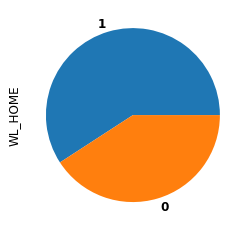

In [ ]:
df_ter_num['WL_HOME'].value_counts().plot.pie();

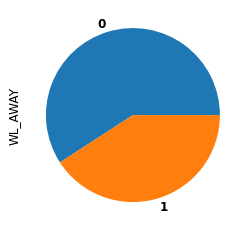

In [ ]:
df_ter_num['WL_AWAY'].value_counts().plot.pie();

In [ ]:
X=df_ter_num.drop(['WL_HOME','WL_AWAY',"LAST_GAME_HOME_TEAM_NAME","LAST_GAME_VISITOR_TEAM_NAME","TimeBtw2Games",'GAME_TIME','GAME_DATE','LAST_GAME_DATE_EST'],axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23810 entries, 38500 to 62447
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SEASON_ID                      23810 non-null  int64  
 1   TEAM_ID_HOME                   23810 non-null  int64  
 2   TEAM_ABBREVIATION_HOME         23810 non-null  object 
 3   MIN_HOME                       23810 non-null  int64  
 4   FG_PCT_HOME                    23810 non-null  float64
 5   FG3_PCT_HOME                   23810 non-null  float64
 6   FT_PCT_HOME                    23810 non-null  float64
 7   OREB_HOME                      23810 non-null  float64
 8   DREB_HOME                      23810 non-null  float64
 9   REB_HOME                       23810 non-null  float64
 10  AST_HOME                       23810 non-null  float64
 11  STL_HOME                       23810 non-null  float64
 12  BLK_HOME                       23810 non-n

In [ ]:
y=df_ter_num['WL_HOME']
y.head()

38500    1
38501    0
38502    0
38503    1
38504    0
Name: WL_HOME, dtype: int64

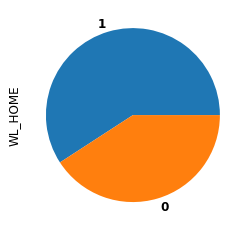

In [ ]:
y.value_counts().plot.pie();

In [ ]:
print('X_shape:',X.shape,'\n \n','y_shape:',y.shape)

X_shape: (23810, 66) 
 
 y_shape: (23810,)


+++ https://github.com/harvardnlp/boxscore-data
CONTIENT LA DEFINITION DE CERTAINES VARIABLES

+++https://github.com/jb-ut/NBA_final_project CONTIENT LA DEFINITION DE CERTAINES VARIABLES + MODELES SIMPLES DE DEEP

+++ https://github.com/swar/nba_api

+++https://github.com/swar/nba_api/blob/master/docs/nba_api/stats/endpoints/boxscoresummaryv2.md

+++ https://sherwynds.medium.com/winning-basketball-62b8668f1ba5

+++ https://github.com/sherwynds/Applied-Machine-Learning/blob/main/8%20-%20Basketball%20Game%20Winner%20Predictive%20Model.ipynb

++++++ https://www.nba.com/stats/help/glossary/
NBA GLOSSARY

https://www.nba.com/stats/

+++ https://www.rookieroad.com/basketball/statistics/

+++ https://rdrr.io/github/saiemgilani/kenpomR/f/docs/docs/NBA/nba_scoreboard.md

https://www.basketball-reference.com/

https://www.nba.com/stats/

+++++ CONTIENT LIENS FB INSTA TWITTER DES EQUIPES
https://bit.io/bitdotio/Basketball%20Dataset/